# Fallstudie Tablet GmbH

## Problemstellung

- Warum war die wirtschaftlich Entwicklung in den letzten beiden Jahren negativ? 
- Welche Faktoren beeinflussten die Situation?
- Wie kann die wirtschaftliche Situation verbessert werden?

## Hypothesen & Fragestellungen (bisher):
- Veränderung der Nachfrage hin zu Tablet Pro & Tablet Mini und weg von Tablet Basic (Silas)
    - Customer Rating als möglicher Indikator (Daniel)
- Downtime als Grund für den geringeren Umsatz in Online-Vertriebskanälen (Vincenzo)
- Sind bestimmte Regionen abhängig von bestimmten Vertriebskanälen/Produkten? (Ali)
- Was verursachte den Umsatzrückgang zum Jahreswechsel? (Ali)

## Einlesen

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_crm = pd.read_csv("./data_csv/CRM_data.csv")
df_downtime = pd.read_csv("./data_csv/Downtime.csv")
df_preise = pd.read_csv("./data_csv/Preise.csv")

df_a_online = pd.read_csv("./data_csv/RegionA_online.csv")
df_a_phone = pd.read_csv("./data_csv/RegionA_phone.csv")
df_a_store = pd.read_csv("./data_csv/RegionA_store.csv")

df_b_online = pd.read_csv("./data_csv/RegionB_online.csv")
df_b_phone = pd.read_csv("./data_csv/RegionB_phone.csv")
df_b_store = pd.read_csv("./data_csv/RegionB_store.csv")

df_c_online = pd.read_csv("./data_csv/RegionC_online.csv")
df_c_phone = pd.read_csv("./data_csv/RegionC_phone.csv")
df_c_store = pd.read_csv("./data_csv/RegionC_store.csv")

df_d_online = pd.read_csv("./data_csv/RegionD_online.csv")
df_d_phone = pd.read_csv("./data_csv/RegionD_phone.csv")
df_d_store = pd.read_csv("./data_csv/RegionD_store.csv")

## Aufbereiten

### CRM-Daten:

In [4]:
df_crm.head()

,id,vorname,nachname,iban,email,customer_rating
0,0,Curt,Roskoth,DE29557982464763273025,curt.roskoth@gmx.de,7.2
1,1,Till,Klingelhöfer,DE36890407044640624074,till.klingelhöfer@gmail.com,8.4
2,2,Dora,Winkler,DE26144834913572865717,dora.winkler@web.de,6.7
3,3,Tom,Krause,DE16352804742225738584,tom.krause@aol.de,9.4
4,4,Dina,Matthäi,DE24968455090529372560,dina.matthäi@hotmail.de,9.1


In [5]:
df_crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               340000 non-null  int64  
 1   vorname          340000 non-null  object 
 2   nachname         340000 non-null  object 
 3   iban             340000 non-null  object 
 4   email            340000 non-null  object 
 5   customer_rating  340000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.6+ MB


In [6]:
# Spalten auf Englisch umbenennen
df_crm = df_crm.rename(columns={
    'vorname': 'first_name',
    'nachname': 'last_name',
})

df_crm.head()

,id,first_name,last_name,iban,email,customer_rating
0,0,Curt,Roskoth,DE29557982464763273025,curt.roskoth@gmx.de,7.2
1,1,Till,Klingelhöfer,DE36890407044640624074,till.klingelhöfer@gmail.com,8.4
2,2,Dora,Winkler,DE26144834913572865717,dora.winkler@web.de,6.7
3,3,Tom,Krause,DE16352804742225738584,tom.krause@aol.de,9.4
4,4,Dina,Matthäi,DE24968455090529372560,dina.matthäi@hotmail.de,9.1


### Preisdaten:

In [7]:
df_preise

,Jahr,product,preis
0,"""2021""",Tablet Pro,999
1,"""""20022""",Tablet Pro,999
2,"""2021""",Tablet Mini,680
3,"""""20022""",Tablet Mini,550
4,"""2021""",Tablet Basics,529
5,"""""20022""",Tablet Basics,499


In [8]:
# Umbenennen der Spalte "Jahr" in "year"
df_preise = df_preise.rename(columns={"Jahr": "year",
                                      "preis": "price"})

# Entfernen von Anfuehrungszeichen
df_preise['year'] = df_preise['year'].apply(lambda x: x.strip('"'))  
# Korrigieren der falschen Jahreszahlen
df_preise['year'] = df_preise['year'].replace({'20022': '2022'})  
# Umwandeln der Spalte "jahr" in Datumsformat
df_preise['year'] = pd.to_datetime(df_preise['year'], format='%Y')

# Spalte "jahr" als Jahreszahl extrahieren
df_preise['year'] = df_preise['year'].dt.year

# Werte "Tablet Basics" in "Tablet Basic" ändern
df_preise['product'] = df_preise['product'].replace({'Tablet Basics': 'Tablet Basic'})

df_preise

,year,product,price
0,2021,Tablet Pro,999
1,2022,Tablet Pro,999
2,2021,Tablet Mini,680
3,2022,Tablet Mini,550
4,2021,Tablet Basic,529
5,2022,Tablet Basic,499


### Downtime-Daten:

In [9]:
df_downtime

,Unnamed: 0,Region A,Region B,Region C,Region D
0,2021,0.10,0.01,0.05,0.00
1,2022,0.15,0.15,0.04,0.01


In [10]:
# Erste Spalte in "year" umbenennen
df_downtime = df_downtime.rename(columns={"Unnamed: 0": "year"})

# Spalte "year" in Datumsformat umwandeln
df_downtime['year'] = pd.to_datetime(df_downtime['year'], format='%Y')

# Spalte "year" als Jahreszahl extrahieren
df_downtime['year'] = df_downtime['year'].dt.year

# Umbenennen der Spalten "Region A" bis "Region D" in "region_a" bis "region_d"
df_downtime = df_downtime.rename(columns={"Region A": "region_a", 
                                          "Region B": "region_b", 
                                          "Region C": "region_c", 
                                          "Region D": "region_d"})

df_downtime

,year,region_a,region_b,region_c,region_d
0,2021,0.10,0.01,0.05,0.00
1,2022,0.15,0.15,0.04,0.01


In [11]:
# df_downtime umformen: Spalten sind die beiden Jahre und die Zeilen die Regionen
df_downtime = df_downtime.melt(id_vars=['year'], var_name='region', value_name='downtime')

# Werte in der Spalte "region" in "A" bis "D" umbenennen
df_downtime['region'] = df_downtime['region'].replace({'region_a': 'A', 
                                                       'region_b': 'B', 
                                                       'region_c': 'C', 
                                                       'region_d': 'D'})

df_downtime

,year,region,downtime
0,2021,A,0.10
1,2022,A,0.15
2,2021,B,0.01
3,2022,B,0.15
4,2021,C,0.05
5,2022,C,0.04
6,2021,D,0.00
7,2022,D,0.01


### Transaktionsdaten:

In [12]:
# Hinzufuegen der Spalten "region" und "channel" mit den entsprechenden Werten
df_a_online = df_a_online.assign(region='A', channel='online')
df_a_phone = df_a_phone.assign(region='A', channel='phone')
df_a_store = df_a_store.assign(region='A', channel='store')

df_b_online = df_b_online.assign(region='B', channel='online')
df_b_phone = df_b_phone.assign(region='B', channel='phone')
df_b_store = df_b_store.assign(region='B', channel='store')

df_c_online = df_c_online.assign(region='C', channel='online')
df_c_phone = df_c_phone.assign(region='C', channel='phone')
df_c_store = df_c_store.assign(region='C', channel='store')

df_d_online = df_d_online.assign(region='D', channel='online')
df_d_phone = df_d_phone.assign(region='D', channel='phone')
df_d_store = df_d_store.assign(region='D', channel='store')

In [13]:
# Umbenennen der Spalte "PRODUKT" in "product" in df_b_phone
df_b_phone = df_b_phone.rename(columns={"PRODUKT": "product"})

In [14]:
# Alle Regionen in einen Dataframe zusammenfassen
df_sales = pd.concat([df_a_online, df_a_phone, df_a_store,
                      df_b_online, df_b_phone, df_b_store, 
                      df_c_online, df_c_phone, df_c_store, 
                      df_d_online, df_d_phone, df_d_store])

In [15]:
# Umbenennen der Spalten "Tablet Basic", "Tablet Mini" und "Tablet Pro", "kosten_basic", "kosten_mini" und "kosten_pro"
df_sales = df_sales.rename(columns={
    "Tablet Basic": "tablet_basic",
    "Tablet Mini": "tablet_mini",
    "Tablet Pro": "tablet_pro",
    "kosten_basic": "cost_basic",
    "kosten_mini": "cost_mini",
    "kosten_pro": "cost_pro"
})

In [16]:
# Umwandeln der Spalte "jahr" in Datumsformat
df_sales["date"] = pd.to_datetime(df_sales["date"])

In [17]:
# NaN in den Spalten cost_basic, cost_mini und cost_pro durch 0 ersetzen
df_sales['cost_basic'] = df_sales['cost_basic'].fillna(0)
df_sales['cost_mini'] = df_sales['cost_mini'].fillna(0)
df_sales['cost_pro'] = df_sales['cost_pro'].fillna(0)

In [18]:
# NaN in "discount" durch 1 ersetzen
df_sales['discount'] = df_sales['discount'].fillna(1)

In [19]:
# Zeige Werte der Spalte "product" an
df_sales['product'].unique()

array(['Tablet Basic', 'Tablet Mini', 'Tablet Pro', 'Tablet Basic...'],
      dtype=object)

In [20]:
# Werte "Tablet Basic..." in "Tablet Basic" aendern
df_sales['product'] = df_sales['product'].replace({'Tablet Basic...': 'Tablet Basic'})

In [21]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340000 entries, 0 to 49438
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            340000 non-null  datetime64[ns]
 1   product         340000 non-null  object        
 2   discount        340000 non-null  float64       
 3   amount          340000 non-null  int64         
 4   tablet_basic    340000 non-null  int64         
 5   tablet_mini     340000 non-null  int64         
 6   tablet_pro      340000 non-null  int64         
 7   cost_basic      340000 non-null  float64       
 8   cost_mini       340000 non-null  float64       
 9   cost_pro        340000 non-null  float64       
 10  transaction_id  340000 non-null  int64         
 11  region          340000 non-null  object        
 12  channel         340000 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 36.3+ MB


In [22]:
df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel
0,2021-11-01,Tablet Basic,1.0,5,1,0,0,170.018118,0.0,0.000000,22,A,online
1,2021-11-01,Tablet Basic,1.0,7,1,0,0,170.019765,0.0,0.000000,24,A,online
2,2021-11-01,Tablet Basic,0.9,7,1,0,0,210.032941,0.0,0.000000,40,A,online
3,2021-11-01,Tablet Basic,1.0,10,1,0,0,170.078236,0.0,0.000000,95,A,online
4,2021-11-01,Tablet Basic,1.0,4,1,0,0,170.085647,0.0,0.000000,104,A,online
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49434,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.987029,339978,D,store
49435,2022-10-31,Tablet Pro,1.0,1,0,0,1,0.000000,0.0,984.988882,339981,D,store
49436,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.991971,339986,D,store
49437,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,984.995059,339991,D,store


## Transformieren

In [23]:
# df_sales und df_crm zusammenfuegen
df_sales = pd.merge(df_sales, df_crm, left_on='transaction_id', right_on='id', how='inner')

In [24]:
# Spalte "id" entfernen
df_sales = df_sales.drop(columns=['id'])

In [25]:
# Neue Spalten "year", "mmonth" und "week" erstellen
df_sales = df_sales.assign(year=df_sales['date'].dt.year,
                           month=df_sales['date'].dt.month,
                           week=df_sales['date'].dt.isocalendar().week)

In [26]:
# Neue Spalte "price" erstellen, basierend auf den Werten in der Spalte "price" in df_preise
df_sales = df_sales.merge(df_preise, on=["year", "product"], how="left")

In [27]:
# Neue Spalte "cost" erstellen
df_sales['cost'] = df_sales["cost_basic"] + df_sales["cost_mini"] + df_sales["cost_pro"]

In [28]:
# Neue Spalte "cost_total" erstellen
df_sales['cost_total'] = df_sales["cost"] * df_sales["amount"]

In [29]:
# Neue Spalte "revenue" erstellen
df_sales['revenue'] = df_sales['price'] * df_sales['amount'] * df_sales['discount']

In [30]:
# Profit pro Stueck berechnen
df_sales["profit_per_piece"] = (df_sales["price"] * df_sales["discount"]) - df_sales["cost"]

In [31]:
# Profit des gesamten Verkaufs berechnen
df_sales["profit_total"] = df_sales["profit_per_piece"] * df_sales["amount"]

In [32]:
# Alle Spalten anzeigen lassen
pd.set_option('display.max_columns', None)
df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,first_name,last_name,iban,email,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total
0,2021-11-01,Tablet Basic,1.0,5,1,0,0,170.018118,0.0,0.000000,22,A,online,Friedhilde,Kuhl,DE23093007879691629842,friedhilde.kuhl@yahoo.de,7.1,2021,11,44,529,170.018118,850.090589,2645.0,358.981882,1794.909411
1,2021-11-01,Tablet Basic,1.0,7,1,0,0,170.019765,0.0,0.000000,24,A,online,Heide-Marie,Fischer,DE26303459399974289421,heide-marie.fischer@gmx.de,5.9,2021,11,44,529,170.019765,1190.138353,3703.0,358.980235,2512.861647
2,2021-11-01,Tablet Basic,0.9,7,1,0,0,210.032941,0.0,0.000000,40,A,online,Ester,Pruschke,DE04679916372817044326,ester.pruschke@gmail.com,7.5,2021,11,44,529,210.032941,1470.230589,3332.7,266.067059,1862.469411
3,2021-11-01,Tablet Basic,1.0,10,1,0,0,170.078236,0.0,0.000000,95,A,online,Klaus,Blümel,DE54334149840465696270,klaus.blümel@aol.de,6.6,2021,11,44,529,170.078236,1700.782355,5290.0,358.921764,3589.217645
4,2021-11-01,Tablet Basic,1.0,4,1,0,0,170.085647,0.0,0.000000,104,A,online,Waldemar,Fritsch,DE54862551075047386387,waldemar.fritsch@web.de,7.3,2021,11,44,529,170.085647,680.342589,2116.0,358.914353,1435.657411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.987029,339978,D,store,Carla,Klemm,DE95736837564420121887,carla.klemm@web.de,7.6,2022,10,44,999,984.987029,2954.961088,2997.0,14.012971,42.038912
339996,2022-10-31,Tablet Pro,1.0,1,0,0,1,0.000000,0.0,984.988882,339981,D,store,Hans-Uwe,Döring,DE96536545575195298222,hans-uwe.döring@yahoo.de,7.6,2022,10,44,999,984.988882,984.988882,999.0,14.011118,14.011118
339997,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.991971,339986,D,store,Irene,Aumann,DE83463083316300535191,irene.aumann@hotmail.de,8.3,2022,10,44,999,984.991971,2954.975912,2997.0,14.008029,42.024088
339998,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,984.995059,339991,D,store,Jolanthe,Spieß,DE73981381785498034616,jolanthe.spieß@gmx.de,9.2,2022,10,44,999,984.995059,1969.990118,1998.0,14.004941,28.009882


In [33]:
# Drop columns "first_name" and "last_name", "iban", "email"
df_sales = df_sales.drop(columns=['first_name', 'last_name', 'iban', 'email'])
df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total
0,2021-11-01,Tablet Basic,1.0,5,1,0,0,170.018118,0.0,0.000000,22,A,online,7.1,2021,11,44,529,170.018118,850.090589,2645.0,358.981882,1794.909411
1,2021-11-01,Tablet Basic,1.0,7,1,0,0,170.019765,0.0,0.000000,24,A,online,5.9,2021,11,44,529,170.019765,1190.138353,3703.0,358.980235,2512.861647
2,2021-11-01,Tablet Basic,0.9,7,1,0,0,210.032941,0.0,0.000000,40,A,online,7.5,2021,11,44,529,210.032941,1470.230589,3332.7,266.067059,1862.469411
3,2021-11-01,Tablet Basic,1.0,10,1,0,0,170.078236,0.0,0.000000,95,A,online,6.6,2021,11,44,529,170.078236,1700.782355,5290.0,358.921764,3589.217645
4,2021-11-01,Tablet Basic,1.0,4,1,0,0,170.085647,0.0,0.000000,104,A,online,7.3,2021,11,44,529,170.085647,680.342589,2116.0,358.914353,1435.657411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.987029,339978,D,store,7.6,2022,10,44,999,984.987029,2954.961088,2997.0,14.012971,42.038912
339996,2022-10-31,Tablet Pro,1.0,1,0,0,1,0.000000,0.0,984.988882,339981,D,store,7.6,2022,10,44,999,984.988882,984.988882,999.0,14.011118,14.011118
339997,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,984.991971,339986,D,store,8.3,2022,10,44,999,984.991971,2954.975912,2997.0,14.008029,42.024088
339998,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,984.995059,339991,D,store,9.2,2022,10,44,999,984.995059,1969.990118,1998.0,14.004941,28.009882


In [34]:
# Sortieren nach Datum
df_sales.sort_values(by=['transaction_id'], inplace=True)

# Reset der Index-Spalte
df_sales.reset_index(drop=True, inplace=True)

In [35]:
df_sales

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total
0,2021-11-01,Tablet Pro,1.0,4,0,0,1,0.000000,0.0,695.000000,0,C,store,7.2,2021,11,44,999,695.000000,2780.000000,3996.0,304.000000,1216.000000
1,2021-11-01,Tablet Basic,1.0,3,1,0,0,170.000824,0.0,0.000000,1,D,online,8.4,2021,11,44,529,170.000824,510.002471,1587.0,358.999176,1076.997529
2,2021-11-01,Tablet Basic,0.9,5,1,0,0,200.001647,0.0,0.000000,2,C,phone,6.7,2021,11,44,529,200.001647,1000.008235,2380.5,276.098353,1380.491765
3,2021-11-01,Tablet Basic,1.0,2,1,0,0,170.002471,0.0,0.000000,3,B,online,9.4,2021,11,44,529,170.002471,340.004941,1058.0,358.997529,717.995059
4,2021-11-01,Tablet Basic,1.0,2,1,0,0,150.003294,0.0,0.000000,4,C,online,9.1,2021,11,44,529,150.003294,300.006588,1058.0,378.996706,757.993412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339995,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,864.997529,339995,D,phone,8.4,2022,10,44,999,864.997529,1729.995059,1998.0,134.002471,268.004941
339996,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,864.998147,339996,D,phone,8.2,2022,10,44,999,864.998147,2594.994441,2997.0,134.001853,402.005559
339997,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,944.998765,339997,D,store,9.9,2022,10,44,999,944.998765,1889.997529,1998.0,54.001235,108.002471
339998,2022-10-31,Tablet Pro,1.0,4,0,0,1,0.000000,0.0,864.999382,339998,B,store,8.7,2022,10,44,999,864.999382,3459.997529,3996.0,134.000618,536.002471


In [36]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              340000 non-null  datetime64[ns]
 1   product           340000 non-null  object        
 2   discount          340000 non-null  float64       
 3   amount            340000 non-null  int64         
 4   tablet_basic      340000 non-null  int64         
 5   tablet_mini       340000 non-null  int64         
 6   tablet_pro        340000 non-null  int64         
 7   cost_basic        340000 non-null  float64       
 8   cost_mini         340000 non-null  float64       
 9   cost_pro          340000 non-null  float64       
 10  transaction_id    340000 non-null  int64         
 11  region            340000 non-null  object        
 12  channel           340000 non-null  object        
 13  customer_rating   340000 non-null  float64       
 14  year

# Hypothese 1: Preise sind gesunken

In [37]:
# Grupperien des durchschnittliche Preises monatlich über beide Jahre hinweg
preis_pro_monat = df_sales.groupby(pd.Grouper(key='date', freq='M')).agg({'price': 'mean'})
preis_pro_monat

,price
date,
2021-11-30,648.198226
2021-12-31,676.004012
2022-01-31,648.918990
2022-02-28,670.960065
2022-03-31,698.520612
2022-04-30,721.662724
2022-05-31,743.540020
2022-06-30,771.642001
2022-07-31,791.277973


Text(0.5, 1.0, 'Average price per month')

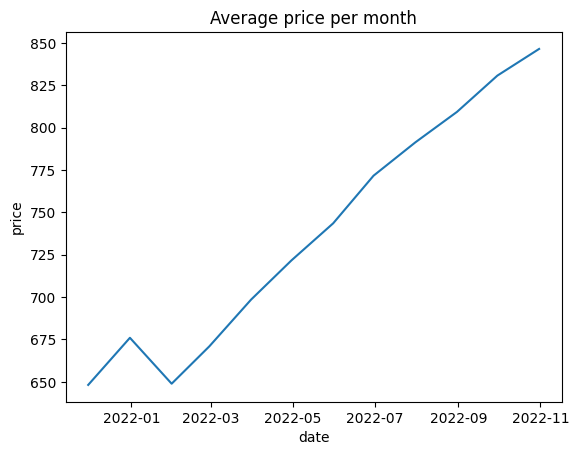

In [38]:
# Plot der monatlichen Preise
line = sns.lineplot(data=preis_pro_monat, x=preis_pro_monat.index, y='price')
line.set_title('Average price per month')

- Nein, durchschnittliche Preise sind gestiegen (liegt wahrscheinlich daran, dass mehr Tablet Pros verkauft wurden)

# Hypothese 2: Menge ist gesunken

In [39]:
# Anzahl verkaufter Produkte pro Monat
menge_pro_monat = df_sales.groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum'})
menge_pro_monat

,amount
date,
2021-11-30,61277
2021-12-31,65326
2022-01-31,64617
2022-02-28,61855
2022-03-31,68756
2022-04-30,65883
2022-05-31,70301
2022-06-30,69096
2022-07-31,70883


In [40]:
# Summe der Transaktionen pro Monat
transaktionen_pro_monat = df_sales.groupby(pd.Grouper(key='date', freq='M')).agg({'transaction_id': 'count'})
transaktionen_pro_monat

,transaction_id
date,
2021-11-30,23453
2021-12-31,25174
2022-01-31,26108
2022-02-28,24665
2022-03-31,27533
2022-04-30,27479
2022-05-31,29273
2022-06-30,29123
2022-07-31,30798


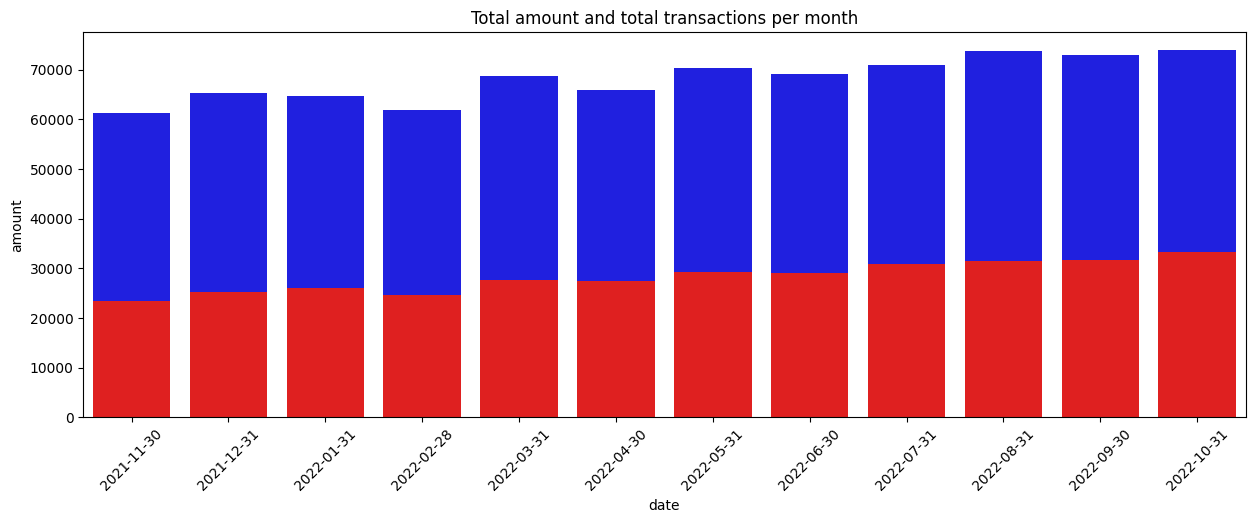

In [41]:
# Beide plots in einem Diagramm
plt.figure(figsize=(15, 5))
sns.barplot(data=menge_pro_monat, x=menge_pro_monat.index, y='amount', color='blue')
sns.barplot(data=transaktionen_pro_monat, x=transaktionen_pro_monat.index, y='transaction_id', color='red')
plt.title('Total amount and total transactions per month')
plt.xticks(rotation=45)
plt.show()

In [42]:
avg_menge_pro_monat = df_sales.groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'mean'})
avg_menge_pro_monat

,amount
date,
2021-11-30,2.612757
2021-12-31,2.594979
2022-01-31,2.474989
2022-02-28,2.507805
2022-03-31,2.497222
2022-04-30,2.397576
2022-05-31,2.401565
2022-06-30,2.372558
2022-07-31,2.301546


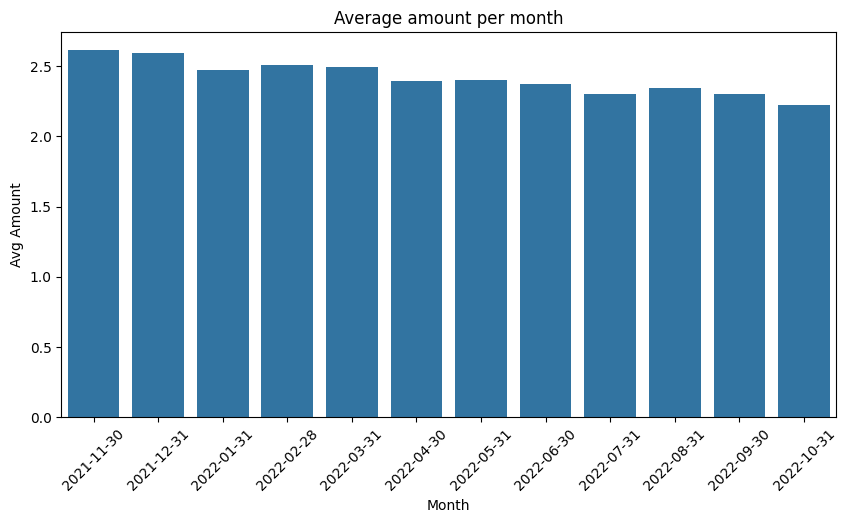

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_menge_pro_monat, x=avg_menge_pro_monat.index, y='amount')

plt.title('Average amount per month')
plt.xlabel('Month')
plt.ylabel('Avg Amount')

plt.xticks(rotation=45)

plt.show()

- Menge verkaufter Artikel und Anzahl Transaktionen sind gestiegen
- Durchschnittlich wurde je Transaktion aber etwas weniger gekauft

# Hypothese 3: Gewinn ist gesunken

In [44]:
umsatz_pro_monat = df_sales.groupby(pd.Grouper(key='date', freq='M')).agg({'revenue': 'sum'})
umsatz_pro_monat

,revenue
date,
2021-11-30,37858455.4
2021-12-31,41972763.7
2022-01-31,39768532.9
2022-02-28,39256396.1
2022-03-31,45568506.5
2022-04-30,45260948.3
2022-05-31,49696519.9
2022-06-30,51100213.7
2022-07-31,53743276.1


Text(0.5, 1.0, 'Revenue per month')

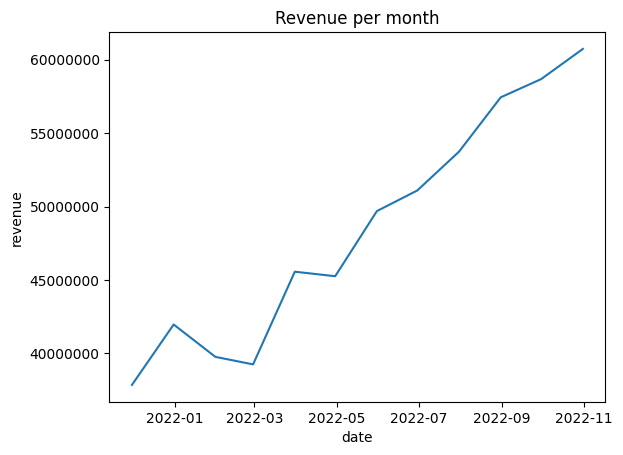

In [45]:
line = sns.lineplot(data=umsatz_pro_monat, x=umsatz_pro_monat.index, y='revenue')
line.ticklabel_format(style='plain', axis='y')
line.set_title('Revenue per month')

In [46]:
kosten_pro_monat = df_sales.groupby(pd.Grouper(key='date', freq='M')).agg({'cost_total': 'sum'})
kosten_pro_monat

,cost_total
date,
2021-11-30,1.697452e+07
2021-12-31,2.065305e+07
2022-01-31,2.310686e+07
2022-02-28,2.387546e+07
2022-03-31,2.920870e+07
2022-04-30,3.026082e+07
2022-05-31,3.438404e+07
2022-06-30,3.680303e+07
2022-07-31,3.983944e+07


Text(0.5, 1.0, 'Cost per month')

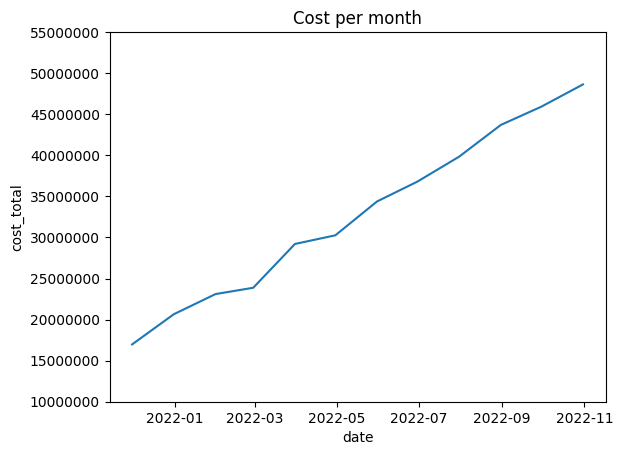

In [47]:
line = sns.lineplot(data=kosten_pro_monat, x=kosten_pro_monat.index, y='cost_total')
line.set_ylim(10000000, 55000000)
line.ticklabel_format(style='plain', axis='y')
line.set_title('Cost per month')

In [48]:
gewinn_pro_monat = df_sales.groupby(pd.Grouper(key='date', freq='M')).agg({'profit_total': 'sum'})
gewinn_pro_monat

,profit_total
date,
2021-11-30,2.088394e+07
2021-12-31,2.131971e+07
2022-01-31,1.666168e+07
2022-02-28,1.538093e+07
2022-03-31,1.635981e+07
2022-04-30,1.500013e+07
2022-05-31,1.531248e+07
2022-06-30,1.429718e+07
2022-07-31,1.390383e+07


Text(0.5, 1.0, 'Profit per month')

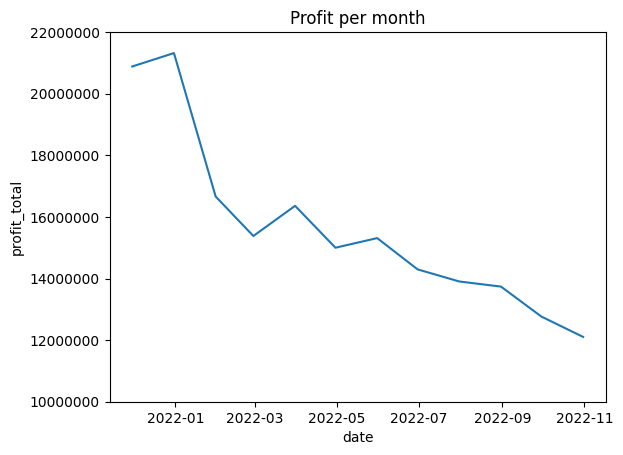

In [49]:
line = sns.lineplot(data=gewinn_pro_monat, x=gewinn_pro_monat.index, y='profit_total')
line.set_ylim(10000000, 22000000)
line.ticklabel_format(style='plain', axis='y')
line.set_title('Profit per month')

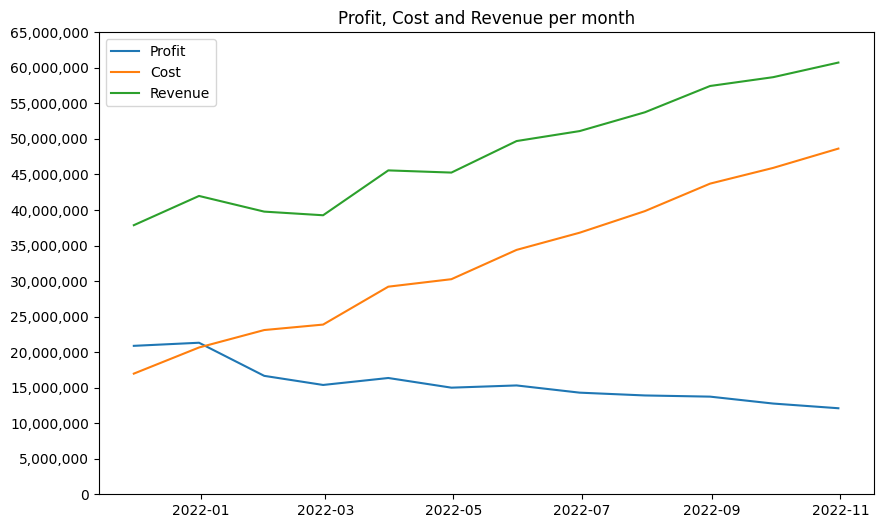

In [50]:
import numpy as np
# Umsatz, Kosten und Profit pro Monat in einem Plot zusammenfassen
plt.figure(figsize=(10, 6))
plt.plot(gewinn_pro_monat, label='Profit')
plt.plot(kosten_pro_monat, label='Cost')
plt.plot(umsatz_pro_monat, label='Revenue')
plt.legend()
plt.title('Profit, Cost and Revenue per month')

# y-Achse in Millionen formatieren
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# y-Achse in 5 mio Schritten
plt.yticks(np.arange(0, 70000000, 5000000))

plt.show()


In [51]:
# Veränderung des Umsatzes von Beginn bis Ende
change_revenue = (umsatz_pro_monat.iloc[-1] - umsatz_pro_monat.iloc[0]) / umsatz_pro_monat.iloc[0] * 100
change_revenue

revenue    60.436956
dtype: float64

In [52]:
# Veränderung der Kosten von Beginn bis Ende
change_cost = (kosten_pro_monat.iloc[-1] - kosten_pro_monat.iloc[0]) / kosten_pro_monat.iloc[0] * 100
change_cost

cost_total    186.515373
dtype: float64

In [53]:
# Veränderung des Gewinns vom Beginn bis zum Ende
change_profit = (gewinn_pro_monat.iloc[-1] - gewinn_pro_monat.iloc[0]) / gewinn_pro_monat.iloc[0] * 100
change_profit

profit_total   -42.039892
dtype: float64

Text(0, 0.5, 'Change in %')

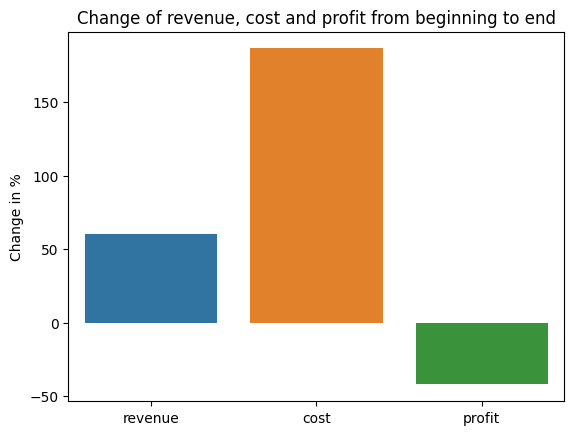

In [54]:
# Veränderung plotten
change = pd.DataFrame({'revenue': change_revenue, 'cost': change_cost, 'profit': change_profit})
change

line = sns.barplot(data=change)
line.set_title('Change of revenue, cost and profit from beginning to end')
line.set_ylabel('Change in %')

- Kosten sind stärker gestiegen als der Umsatz
- Daher ist der Gewinn um ca. 42% gesunken

# Hypothese 4: Regionen haben unterschiedlich gut performt

In [55]:
# Umsatz, Kosten und Gewinn pro Monat für Region A
df_sales_a = df_sales[df_sales['region'] == 'A'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Monat für Region B
df_sales_b = df_sales[df_sales['region'] == 'B'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Monat für Region C
df_sales_c = df_sales[df_sales['region'] == 'C'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Monat für Region D
df_sales_d = df_sales[df_sales['region'] == 'D'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

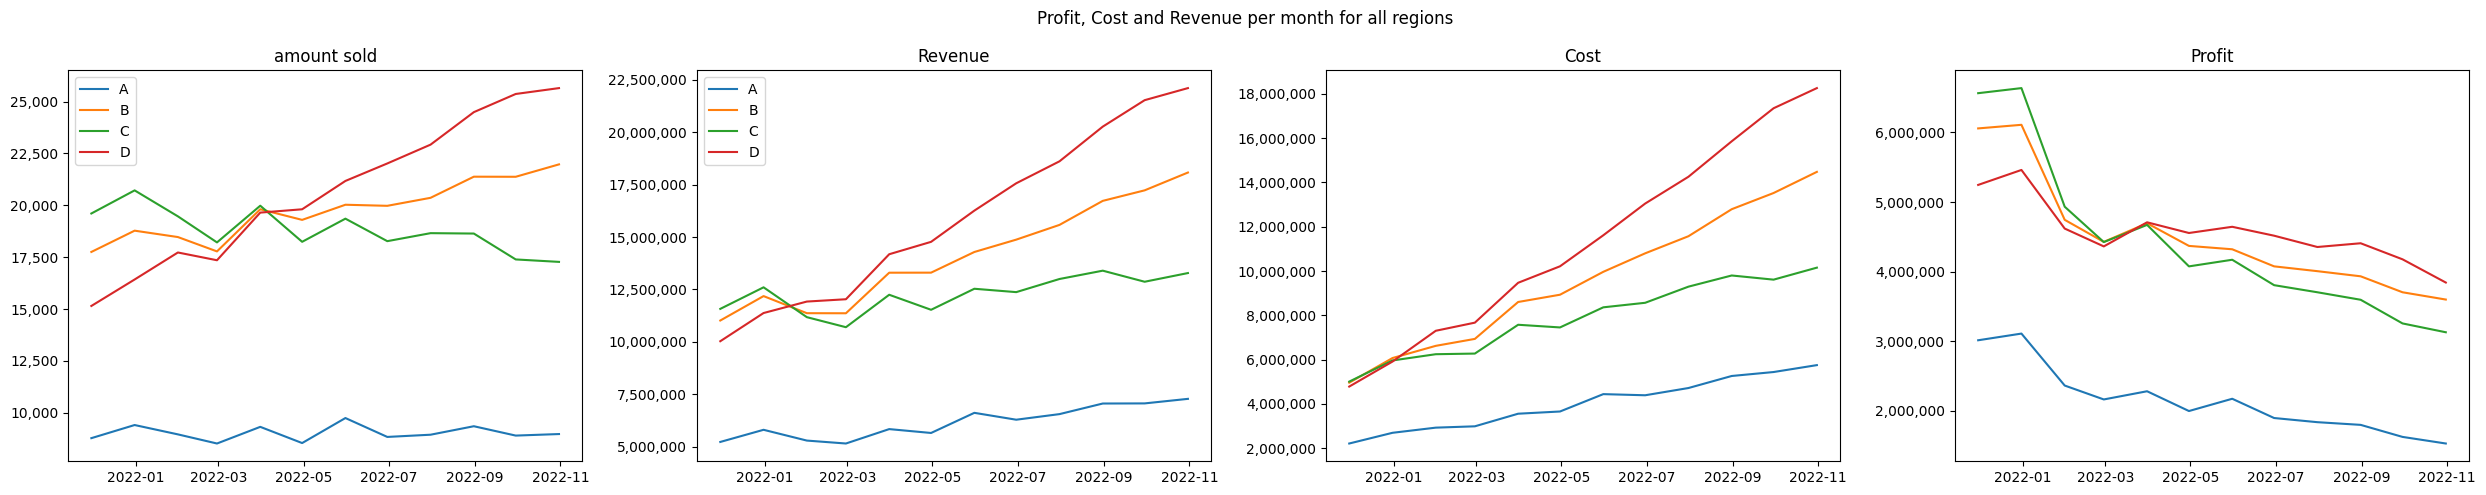

In [56]:
# Umsatz, Kosten und Gewinn pro Monat für alle Regionen jeweils als Subplot visualisieren und alle Subplots zusammenfassen
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle('Profit, Cost and Revenue per month for all regions')

axes[0].plot(df_sales_a['amount'], label='A')
axes[0].plot(df_sales_b['amount'], label='B')
axes[0].plot(df_sales_c['amount'], label='C')
axes[0].plot(df_sales_d['amount'], label='D')
axes[0].set_title('amount sold')
axes[0].legend()

axes[1].plot(df_sales_a['revenue'], label='A')
axes[1].plot(df_sales_b['revenue'], label='B')
axes[1].plot(df_sales_c['revenue'], label='C')
axes[1].plot(df_sales_d['revenue'], label='D')
axes[1].set_title('Revenue')
axes[1].legend()

axes[2].plot(df_sales_a['cost_total'], label='A')
axes[2].plot(df_sales_b['cost_total'], label='B')
axes[2].plot(df_sales_c['cost_total'], label='C')
axes[2].plot(df_sales_d['cost_total'], label='D')
axes[2].set_title('Cost')

axes[3].plot(df_sales_a['profit_total'], label='A')
axes[3].plot(df_sales_b['profit_total'], label='B')
axes[3].plot(df_sales_c['profit_total'], label='C')
axes[3].plot(df_sales_d['profit_total'], label='D')
axes[3].set_title('Profit')

# y-Achse in Millionen formatieren
for ax in axes:
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()

- Alle Regionen haben den gleichen Abwärtstrend beim Gewinn durchgemacht
    - Region C hatte die größte Gewinnsenkung
- Region D hat im Vergleich am besten performt

# Hypothese 5: Vertriebskanäle haben unterschiedlich performt

In [57]:
# Umsatz, Kosten und Gewinn pro Woche für Verkaufskanal Online
df_sales_online = df_sales[df_sales['channel'] == 'online'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Woche für Verkaufskanal Phone
df_sales_phone = df_sales[df_sales['channel'] == 'phone'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Umsatz, Kosten und Gewinn pro Woche für Verkaufskanal Store
df_sales_store = df_sales[df_sales['channel'] == 'store'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

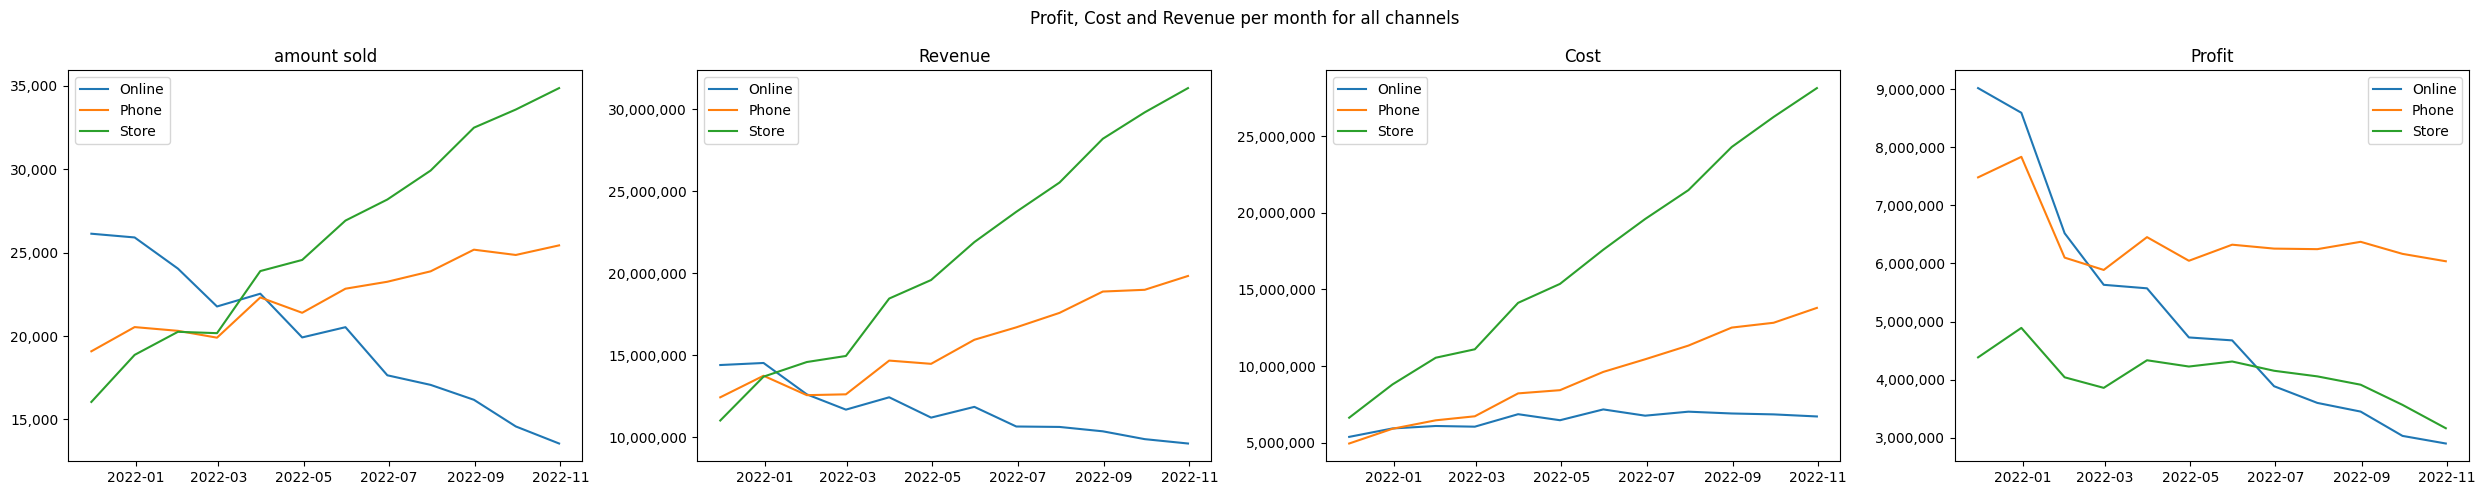

In [58]:
# Umsatz, Kosten und Gewinn pro Woche für alle Verkaufskanäle jeweils als Subplot visualisieren und alle Subplots zusammenfassen
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle('Profit, Cost and Revenue per month for all channels')

axes[0].plot(df_sales_online['amount'], label='Online')
axes[0].plot(df_sales_phone['amount'], label='Phone')
axes[0].plot(df_sales_store['amount'], label='Store')
axes[0].set_title('amount sold')
axes[0].legend()

axes[1].plot(df_sales_online['revenue'], label='Online')
axes[1].plot(df_sales_phone['revenue'], label='Phone')
axes[1].plot(df_sales_store['revenue'], label='Store')
axes[1].set_title('Revenue')
axes[1].legend()

axes[2].plot(df_sales_online['cost_total'], label='Online')
axes[2].plot(df_sales_phone['cost_total'], label='Phone')
axes[2].plot(df_sales_store['cost_total'], label='Store')
axes[2].set_title('Cost')
axes[2].legend()

axes[3].plot(df_sales_online['profit_total'], label='Online')
axes[3].plot(df_sales_phone['profit_total'], label='Phone')
axes[3].plot(df_sales_store['profit_total'], label='Store')
axes[3].set_title('Profit')
axes[3].legend()

# y-Achse in Millionen formatieren
for ax in axes:
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
plt.tight_layout()

- Online hat den größten Gewinnverlust erfahren

## Vergleich der Online-Kanäle der Regionen A bis D

In [59]:
# Anzahl verkaufter Produkte, Umsatz, Kosten und Gewinn pro Monat für die Regionen A, B, C und D in dem Kanal Online
df_sales_online_a = df_sales[(df_sales['region'] == 'A') & (df_sales['channel'] == 'online')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_online_b = df_sales[(df_sales['region'] == 'B') & (df_sales['channel'] == 'online')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_online_c = df_sales[(df_sales['region'] == 'C') & (df_sales['channel'] == 'online')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_online_d = df_sales[(df_sales['region'] == 'D') & (df_sales['channel'] == 'online')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

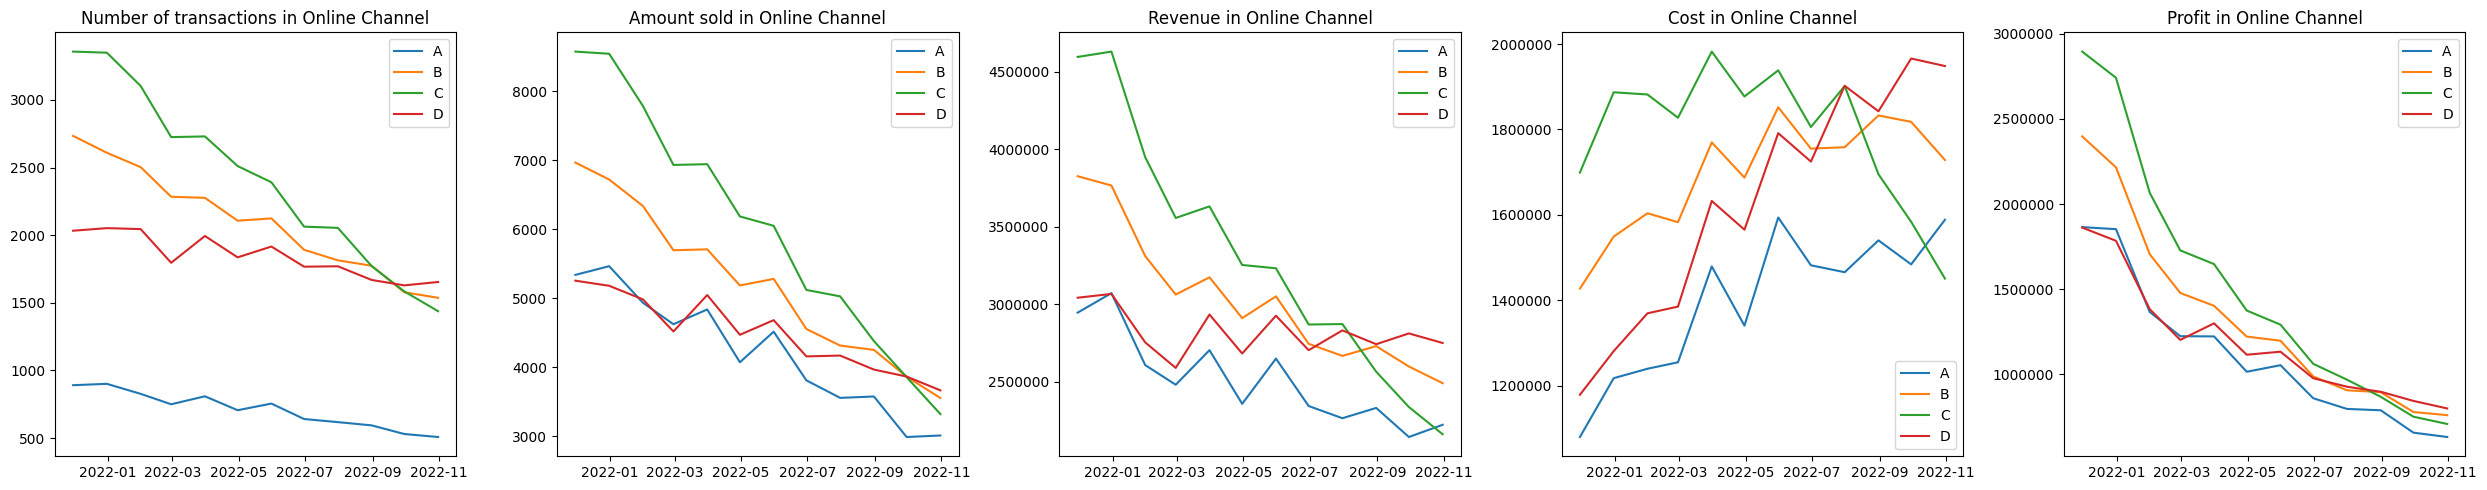

In [60]:
# Verkaufskanal Online für alle Regionen in einem Plot zusammenfassen
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].plot(df_sales_online_a['transaction_id'], label='A')
axes[0].plot(df_sales_online_b['transaction_id'], label='B')
axes[0].plot(df_sales_online_c['transaction_id'], label='C')
axes[0].plot(df_sales_online_d['transaction_id'], label='D')
axes[0].set_title('Number of transactions in Online Channel')
axes[0].legend()

axes[1].plot(df_sales_online_a['amount'], label='A')
axes[1].plot(df_sales_online_b['amount'], label='B')
axes[1].plot(df_sales_online_c['amount'], label='C')
axes[1].plot(df_sales_online_d['amount'], label='D')
axes[1].set_title('Amount sold in Online Channel')
axes[1].legend()

axes[2].plot(df_sales_online_a['revenue'], label='A')
axes[2].plot(df_sales_online_b['revenue'], label='B')
axes[2].plot(df_sales_online_c['revenue'], label='C')
axes[2].plot(df_sales_online_d['revenue'], label='D')
axes[2].set_title('Revenue in Online Channel')
axes[2].legend()

axes[3].plot(df_sales_online_a['cost_total'], label='A')
axes[3].plot(df_sales_online_b['cost_total'], label='B')
axes[3].plot(df_sales_online_c['cost_total'], label='C')
axes[3].plot(df_sales_online_d['cost_total'], label='D')
axes[3].set_title('Cost in Online Channel')
axes[3].legend()

axes[4].plot(df_sales_online_a['profit_total'], label='A')
axes[4].plot(df_sales_online_b['profit_total'], label='B')
axes[4].plot(df_sales_online_c['profit_total'], label='C')
axes[4].plot(df_sales_online_d['profit_total'], label='D')
axes[4].set_title('Profit in Online Channel')
axes[4].legend()

# y-Achse ohne wissenschaftliche Notation
for ax in axes:
    ax.ticklabel_format(style='plain', axis='y')
    
plt.tight_layout()

# Hypothese 6: Produkte haben unterschiedlich gut performt

In [61]:
# Anzahl verkaufter Produkte, Umsatz, Kosten und Gewinn pro Monat für Produkt "Tablet Basic"
df_sales_basic = df_sales[df_sales['product'] == 'Tablet Basic'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Anzahl verkaufter Produkte, Umsatz, Kosten und Gewinn pro Monat für Produkt "Tablet Mini"
df_sales_mini = df_sales[df_sales['product'] == 'Tablet Mini'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

# Anzahl verkaufter Produkte, Umsatz, Kosten und Gewinn pro Monat für Produkt "Tablet Pro"
df_sales_pro = df_sales[df_sales['product'] == 'Tablet Pro'].groupby(pd.Grouper(key='date', freq='M')).agg({'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

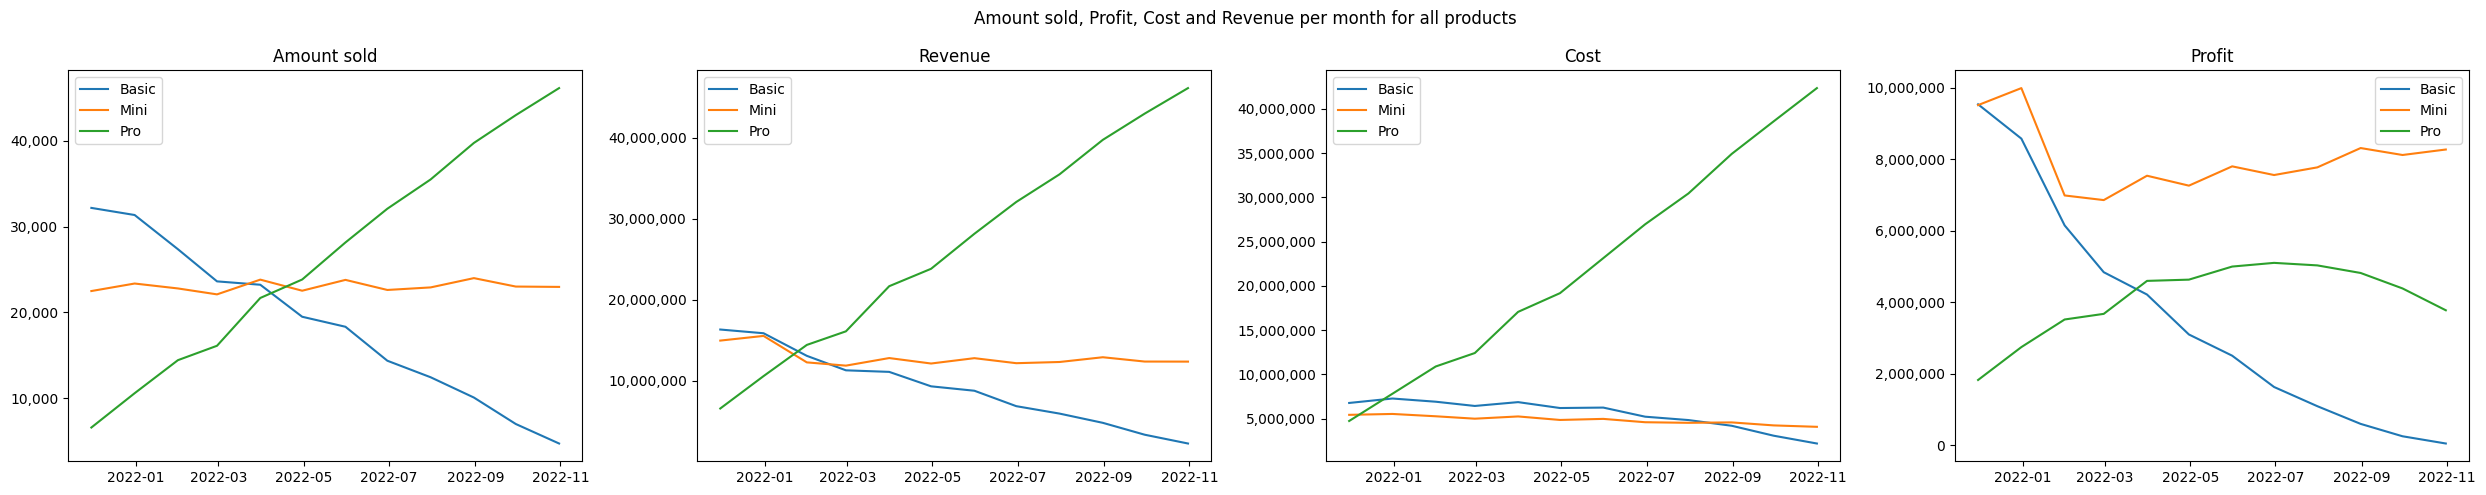

In [62]:
# Umsatz, Kosten und Gewinn pro Monat für alle Produkte jeweils als Subplot visualisieren und alle Subplots zusammenfassen
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle('Amount sold, Profit, Cost and Revenue per month for all products')

axes[0].plot(df_sales_basic['amount'], label='Basic')
axes[0].plot(df_sales_mini['amount'], label='Mini')
axes[0].plot(df_sales_pro['amount'], label='Pro')
axes[0].set_title('Amount sold')
axes[0].legend()

axes[1].plot(df_sales_basic['revenue'], label='Basic')
axes[1].plot(df_sales_mini['revenue'], label='Mini')
axes[1].plot(df_sales_pro['revenue'], label='Pro')
axes[1].set_title('Revenue')
axes[1].legend()

axes[2].plot(df_sales_basic['cost_total'], label='Basic')
axes[2].plot(df_sales_mini['cost_total'], label='Mini')
axes[2].plot(df_sales_pro['cost_total'], label='Pro')
axes[2].set_title('Cost')
axes[2].legend()

axes[3].plot(df_sales_basic['profit_total'], label='Basic')
axes[3].plot(df_sales_mini['profit_total'], label='Mini')
axes[3].plot(df_sales_pro['profit_total'], label='Pro')
axes[3].set_title('Profit')
axes[3].legend()

# y-Achse in Millionen formatieren
for ax in axes:
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()

In [63]:
# Veränderung von Anfang bis Ende für die Produkte "Tablet Basic", "Tablet Mini" und "Tablet Pro"
def calc_change(df, productname):
    print("Veränderung Anzahl sold", productname, ":", (df.iloc[-1]['amount'] - df.iloc[0]['amount']) / df.iloc[0]['amount'] * 100)
    print("Veränderung Umsatz", productname, ":", (df.iloc[-1]['revenue'] - df.iloc[0]['revenue']) / df.iloc[0]['revenue'] * 100)
    print("Veränderung Kosten", productname, ":", (df.iloc[-1]['cost_total'] - df.iloc[0]['cost_total']) / df.iloc[0]['cost_total'] * 100)
    print("Veränderung Gewinn", productname, ":", (df.iloc[-1]['profit_total'] - df.iloc[0]['profit_total']) / df.iloc[0]['profit_total'] * 100)
    print()


calc_change(df_sales_basic, "Tablet Basic")
calc_change(df_sales_mini, "Tablet Mini")
calc_change(df_sales_pro, "Tablet Pro")

Veränderung Anzahl sold Tablet Basic : -85.34244447895635
Veränderung Umsatz Tablet Basic : -86.18093023980686
Veränderung Kosten Tablet Basic : -67.50920025638224
Veränderung Gewinn Tablet Basic : -99.46026796323004

Veränderung Anzahl sold Tablet Mini : 2.1467620783145915
Veränderung Umsatz Tablet Mini : -17.34833639605604
Veränderung Kosten Tablet Mini : -24.868424323538143
Veränderung Gewinn Tablet Mini : -13.048132434055942

Veränderung Anzahl sold Tablet Pro : 601.2912046179554
Veränderung Umsatz Tablet Pro : 601.2912046179554
Veränderung Kosten Tablet Pro : 791.7200274938408
Veränderung Gewinn Tablet Pro : 106.66696550045928



- Tablet Basic hat sich stark verschlechtert -> Von ca. 9,5 Mio. Gewinn zu 50.000
    - Wurde auch deutlich weniger verkauft
- Gewinn von Tablet Mini hat sich zum Jahreswechsel verschlechtert, aber hat sich danach verbessert und nun ist das profitabelste Produkt
    - Anzahl verkaufter Produkte stagniert, aber leicht gestiegen
- Gewinn von Tablet Pro hat sich stark verbessert, aber Trend ist zum Ende 2022 negativ
    - Anzahl, Umsatz und Kosten sind sehr stark gestiegen
    - Jedoch sind Kosten stärker gestiegen als Umsatz

## Transaktionen mit Verlust

In [64]:
# Transaktionen mit Verlust
df_sales_negative_profit = df_sales[df_sales['profit_total'] < 0]
df_sales_negative_profit

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total
48806,2022-01-01,Tablet Basic,0.9,9,1,0,0,460.193295,0.0,0.0,48806,C,store,8.6,2022,1,52,499,460.193295,4141.739652,4041.9,-11.093295,-99.839652
52656,2022-01-05,Tablet Basic,0.9,11,1,0,0,463.363892,0.0,0.0,52656,C,store,5.5,2022,1,1,499,463.363892,5097.002815,4940.1,-14.263892,-156.902815
52659,2022-01-05,Tablet Basic,0.9,11,1,0,0,483.366363,0.0,0.0,52659,C,store,6.3,2022,1,1,499,483.366363,5317.029991,4940.1,-34.266363,-376.929991
60396,2022-01-15,Tablet Basic,0.9,8,1,0,0,449.738029,0.0,0.0,60396,C,store,5.0,2022,1,2,499,449.738029,3597.904229,3592.8,-0.638029,-5.104229
65847,2022-01-21,Tablet Basic,0.9,9,1,0,0,454.227101,0.0,0.0,65847,C,store,5.8,2022,1,3,499,454.227101,4088.043906,4041.9,-5.127101,-46.143906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338986,2022-10-31,Tablet Basic,0.9,3,1,0,0,579.165762,0.0,0.0,338986,C,store,4.5,2022,10,44,499,579.165762,1737.497287,1347.3,-130.065762,-390.197287
338988,2022-10-31,Tablet Basic,0.9,5,1,0,0,479.167409,0.0,0.0,338988,C,phone,3.7,2022,10,44,499,479.167409,2395.837047,2245.5,-30.067409,-150.337047
338989,2022-10-31,Tablet Basic,1.0,2,1,0,0,539.168233,0.0,0.0,338989,B,store,3.1,2022,10,44,499,539.168233,1078.336466,998.0,-40.168233,-80.336466
338996,2022-10-31,Tablet Basic,0.9,3,1,0,0,449.173998,0.0,0.0,338996,C,online,2.5,2022,10,44,499,449.173998,1347.521993,1347.3,-0.073998,-0.221993


In [65]:
# Welche Produkte wurden mit einem Verlust verkauft?
df_sales_negative_profit['product'].unique()

array(['Tablet Basic'], dtype=object)

- Nur mit Tablet Basic wurden Verlustgeschäfte gemacht, insg. 2314 Transaktionen

In [66]:
# Summe des Verlusts
df_sales_negative_profit['profit_total'].sum()

-459619.7704372656

- Mit dem Tablet Basic wurde in 2314 Transaktionen insg. 460 Tsd. EUR Verlust gemacht 

In [67]:
# In welchen Verkaufskanälen und Regionen wurden die Produkte mit negativem Gewinn verkauft und wie oft?
df_sales_negative_profit.groupby(['region', 'channel']).agg({'transaction_id': 'count', 'profit_total': 'sum'})

transaction_id   profit_total
region channel                               
A      online               42  -10857.505382
       phone                21   -3889.065212
       store               177  -32965.078126
B      online              130  -24764.827450
       phone                50   -8280.720653
       store               524 -107624.326263
C      online              162  -28386.681295
       phone                61   -9026.066437
       store               674 -143836.808478
D      online               93  -17198.166001
       phone                40   -9229.262345
       store               340  -63561.262795

- Meistens in den Stores

## Wie oft wurden die Produkte in den einzelnen Regionen verkauft?

In [68]:
# Group by channel, product and sum up amount
sales_per_product_by_channel = df_sales.groupby(['channel', 'product']).agg({'amount': 'sum'})
sales_per_product_by_channel = sales_per_product_by_channel.reset_index()
sales_per_product_by_channel

,channel,product,amount
0,online,Tablet Basic,141081
1,online,Tablet Mini,62273
2,online,Tablet Pro,36558
3,phone,Tablet Basic,41819
4,phone,Tablet Mini,133669
5,phone,Tablet Pro,93539
6,store,Tablet Basic,41340
7,store,Tablet Mini,80573
8,store,Tablet Pro,187896


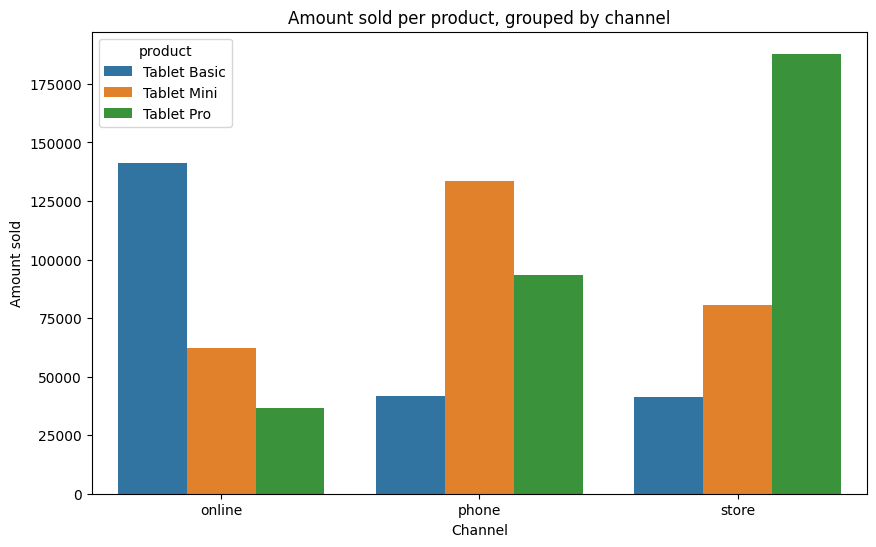

In [69]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sales_per_product_by_channel, x='channel', y='amount', hue='product')

plt.title('Amount sold per product, grouped by channel')
plt.xlabel('Channel')
plt.ylabel('Amount sold')
plt.show()

## Wie oft wurden die Produkte in den einzelnen Regionen verkauft?

In [70]:
# Group by region, product and sum up amount
sales_per_product_by_region = df_sales.groupby(['region', 'product']).agg({'amount': 'sum'})
sales_per_product_by_region = sales_per_product_by_region.reset_index()
sales_per_product_by_region

,region,product,amount
0,A,Tablet Basic,37414
1,A,Tablet Mini,34399
2,A,Tablet Pro,36433
3,B,Tablet Basic,61842
4,B,Tablet Mini,81098
5,B,Tablet Pro,94030
6,C,Tablet Basic,83512
7,C,Tablet Mini,80366
8,C,Tablet Pro,61928
9,D,Tablet Basic,41472


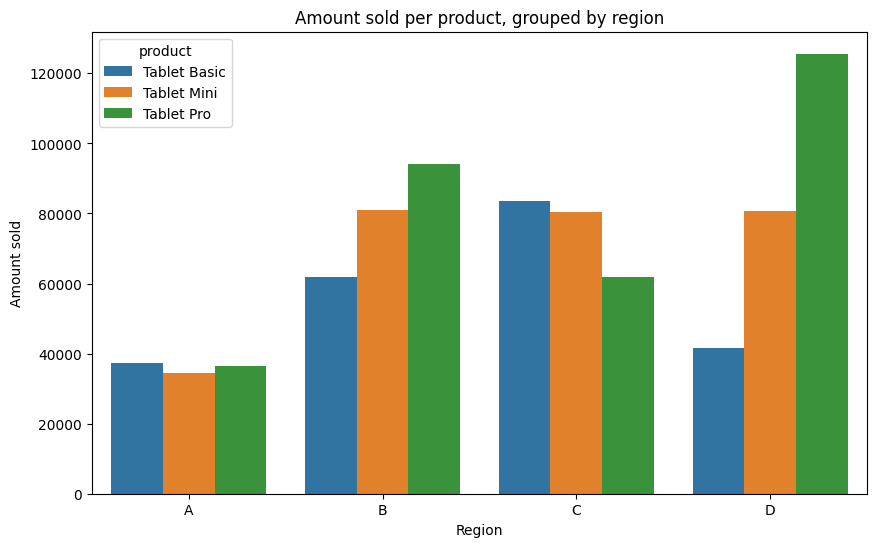

In [71]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sales_per_product_by_region, x='region', y='amount', hue='product')

plt.title('Amount sold per product, grouped by region')
plt.xlabel('Region')
plt.ylabel('Amount sold')
plt.show()

# Hypothese 7: Es wurden mehr Rabatte gewährt

In [72]:
# Durchschnittlicher Rabatt pro Monat
rabatt_pro_monat = df_sales.groupby(pd.Grouper(key='date', freq='M')).agg({'discount': 'mean'})
rabatt_pro_monat

,discount
date,
2021-11-30,0.982083
2021-12-31,0.982708
2022-01-31,0.985388
2022-02-28,0.986000
2022-03-31,0.987644
2022-04-30,0.989246
2022-05-31,0.990261
2022-06-30,0.991684
2022-07-31,0.992610


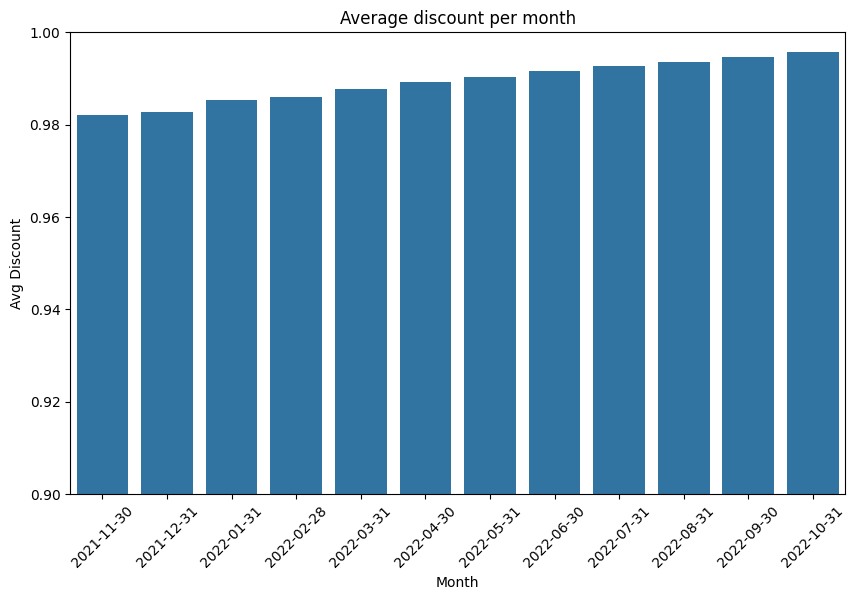

In [73]:
# Als barplot visualisieren
plt.figure(figsize=(10, 6))

sns.barplot(data=rabatt_pro_monat, x=rabatt_pro_monat.index, y='discount')
plt.title('Average discount per month')
plt.xlabel('Month')
plt.ylabel('Avg Discount')

plt.ylim(0.90, 1.0)

plt.xticks(rotation=45)

plt.show()

- Nein, Rabatte haben sich sogar verringert

In [74]:
# Durchschnittliche Rabatte pro Produkt pro Monat
rabatt_pro_monat_pro_produkt = df_sales.groupby(['product', 'year', "month"]).agg({'discount': 'mean'})  
rabatt_pro_monat_pro_produkt

discount
product      year month          
Tablet Basic 2021 11     0.970822
                  12     0.968945
             2022 1      0.970173
                  2      0.969759
                  3      0.969984
                  4      0.970160
                  5      0.970740
                  6      0.969446
                  7      0.970171
                  8      0.969319
                  9      0.970370
                  10     0.970052
Tablet Mini  2021 11     0.990274
                  12     0.990043
             2022 1      0.990755
                  2      0.989508
                  3      0.989776
                  4      0.990713
                  5      0.989915
                  6      0.990603
                  7      0.989910
                  8      0.989892
                  9      0.989841
                  10     0.990576
Tablet Pro   2021 11     1.000000
                  12     1.000000
             2022 1      1.000000
                  2      1.000000
                  3      1.000000
                  4      1.000000
                  5      1.000000
                  6      1.000000
                  7      1.000000
                  8      1.000000
                  9      1.000000
                  10     1.000000

Text(0.5, 0, 'Month')

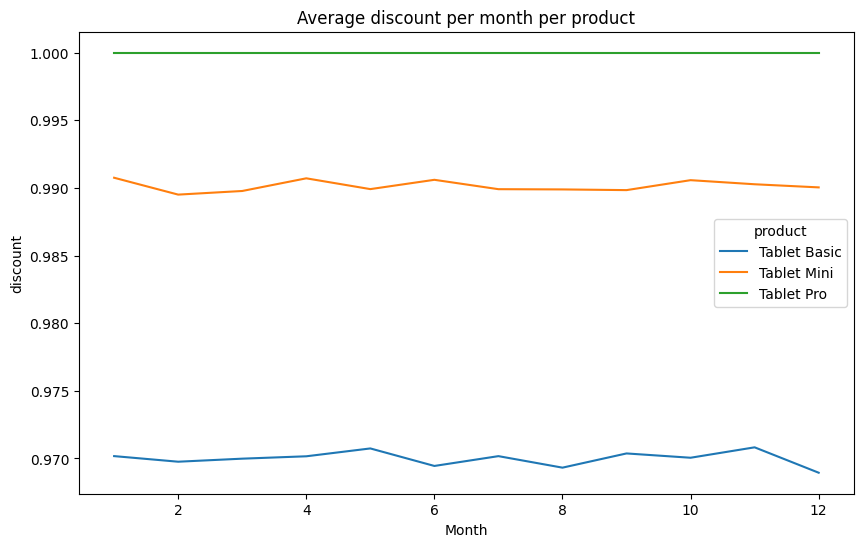

In [75]:
# Entfernen der Multi-Index-Spalten
rabatt_pro_monat_pro_produkt = rabatt_pro_monat_pro_produkt.reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=rabatt_pro_monat_pro_produkt, x='month', y='discount', hue='product')
plt.title('Average discount per month per product')
plt.xlabel('Month')

# Hypothese 8: Kundenzufriedenheit hat sich verändert

In [76]:
# Durschnittliches Customer Rating pro Monat für Tablet Basic
rating_basic = df_sales[df_sales['product'] == 'Tablet Basic'].groupby(pd.Grouper(key='date', freq='M')).agg({'customer_rating': 'mean'})

# Durschnittliches Customer Rating pro Monat für Tablet Mini
rating_mini = df_sales[df_sales['product'] == 'Tablet Mini'].groupby(pd.Grouper(key='date', freq='M')).agg({'customer_rating': 'mean'})

# Durschnittliches Customer Rating pro Monat für Tablet Pro
rating_pro = df_sales[df_sales['product'] == 'Tablet Pro'].groupby(pd.Grouper(key='date', freq='M')).agg({'customer_rating': 'mean'})

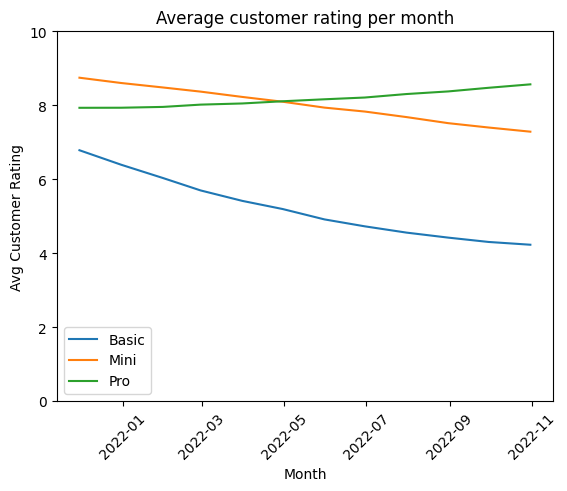

In [77]:
sns.lineplot(data=rating_basic, x=rating_basic.index, y='customer_rating', label='Basic')
sns.lineplot(data=rating_mini, x=rating_mini.index, y='customer_rating', label='Mini')
sns.lineplot(data=rating_pro, x=rating_pro.index, y='customer_rating', label='Pro')

plt.title('Average customer rating per month')
plt.xlabel('Month')
plt.ylabel('Avg Customer Rating')

plt.ylim(0, 10)
plt.xticks(rotation=45)

plt.show()

- Kundenzufriedenheit für Tablet Basic ist relativ stark gesunken
- Kundenzufriedenheit für Tablet Mini ist im Vergleich leichter gesunken
- Kundenzufriedenheit für Tablet Pro ist gestiegen

## (Versuch, Umsatz nach Customer Rating als Regression zu plotten)

<Axes: xlabel='customer_rating', ylabel='revenue'>

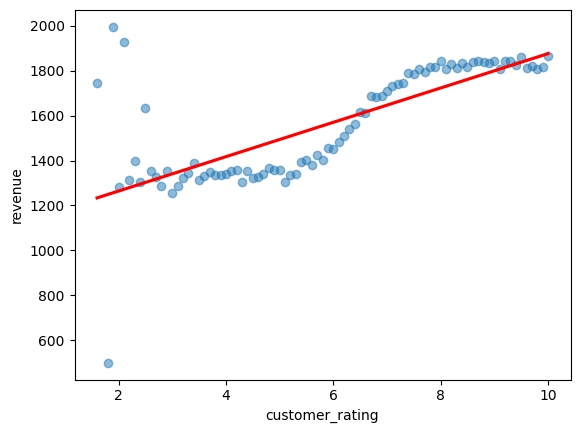

In [78]:
umsatz_by_customer_rating = df_sales.groupby('customer_rating').agg({'revenue': 'mean',
                                                                     "customer_rating": "mean"})

sns.regplot(x="customer_rating", y="revenue", data=umsatz_by_customer_rating, ci=True, 
            line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})

In [79]:
import statsmodels.formula.api as smf

# Lineare Regression für die Spalte "revenue" erstellen
model = smf.ols(formula='revenue ~ customer_rating', data=df_sales).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS              Adj. R-squared:     0.022       
Dependent Variable: revenue          AIC:                5715723.3582
Date:               2023-12-19 09:37 BIC:                5715744.8316
No. Observations:   340000           Log-Likelihood:     -2.8579e+06 
Df Model:           1                F-statistic:        7615.       
Df Residuals:       339998           Prob (F-statistic): 0.00        
R-squared:          0.022            Scale:              1.1706e+06  
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept         941.3988   8.9911 104.7031 0.0000 923.7764 959.0212
customer_rating   101.5559   1.1638  87.2620 0.0000  99.2749 103.8369
---------------------------------------------------------------------
Omnibus:             99510.668      Durbin-Watson:         1.625     
Prob(Omnibus):       0.000          Jarque-Bera (JB):      331980.665
Skew:                1.482          Prob(JB):              0.000     
Kurtosis:            6.828          Condition No.:         38        
=====================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
"""

## Umsatz je Customer Rating für jedes Produkt

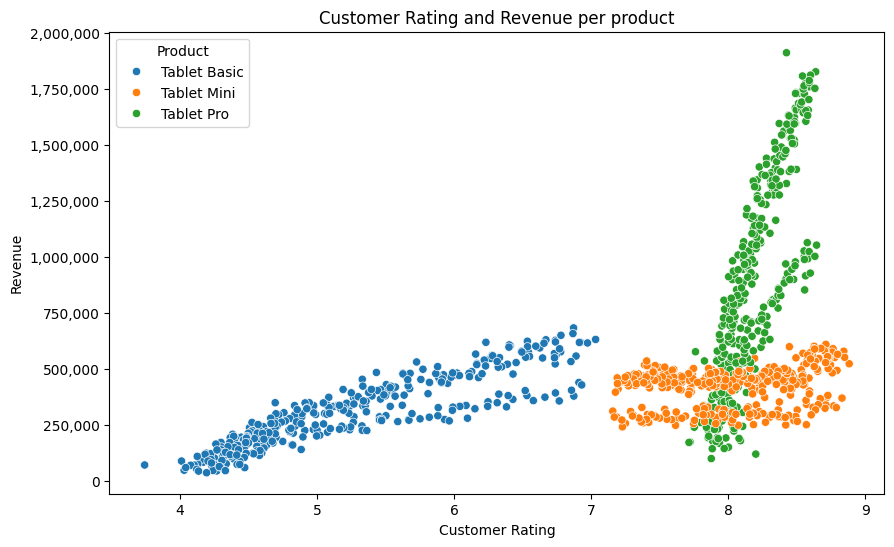

In [80]:
sales_by_rating = df_sales.groupby(["date", 'product']).agg({'customer_rating': 'mean',
                                                            'revenue': 'sum'})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_by_rating, x='customer_rating', y='revenue', hue='product')
plt.title('Customer Rating and Revenue per product')
plt.xlabel('Customer Rating')
plt.ylabel('Revenue')
plt.legend(title="Product")

# y-Achse in Millionen formatieren
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

In [81]:
correlation_sales_rating = sales_by_rating.corr()
correlation_sales_rating[['customer_rating']].loc[['revenue']]

,customer_rating
revenue,0.551485


- Positive Korrelation: Es gibt eine positive Korrelation zwischen den Kundenbewertungen und den Verkaufszahlen. Dies deutet darauf hin, dass Produkte mit höheren Kundenbewertungen tendenziell höhere Verkaufszahlen aufweisen.

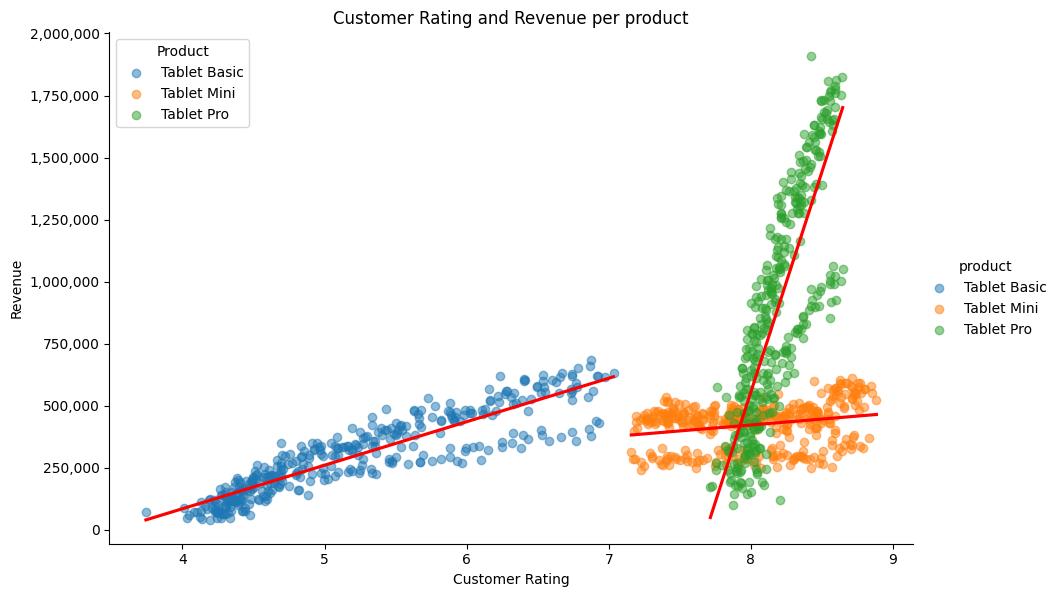

In [82]:
sales_by_rating = sales_by_rating.reset_index()
sns.lmplot(data=sales_by_rating, x="customer_rating", y="revenue", hue='product', ci=None, height=6, aspect=1.5, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title('Customer Rating and Revenue per product')
plt.xlabel('Customer Rating')
plt.ylabel('Revenue')
plt.legend(title="Product")

# y-Achse in Millionen formatieren
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

# Hypothese 9: Downtime war ein Grund für die schlechte Entwicklung des Online-Stores

In [83]:
df_downtime

,year,region,downtime
0,2021,A,0.10
1,2022,A,0.15
2,2021,B,0.01
3,2022,B,0.15
4,2021,C,0.05
5,2022,C,0.04
6,2021,D,0.00
7,2022,D,0.01


In [84]:
# Alle Transaktionen im Kanal Online in einem Dataframe zusammenfassen
sales_online = df_sales[df_sales['channel'] == 'online']
sales_online

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total
1,2021-11-01,Tablet Basic,1.0,3,1,0,0,170.000824,0.0,0.000000,1,D,online,8.4,2021,11,44,529,170.000824,510.002471,1587.0,358.999176,1076.997529
3,2021-11-01,Tablet Basic,1.0,2,1,0,0,170.002471,0.0,0.000000,3,B,online,9.4,2021,11,44,529,170.002471,340.004941,1058.0,358.997529,717.995059
4,2021-11-01,Tablet Basic,1.0,2,1,0,0,150.003294,0.0,0.000000,4,C,online,9.1,2021,11,44,529,150.003294,300.006588,1058.0,378.996706,757.993412
7,2021-11-01,Tablet Basic,1.0,3,1,0,0,170.005765,0.0,0.000000,7,C,online,5.5,2021,11,44,529,170.005765,510.017294,1587.0,358.994235,1076.982706
8,2021-11-01,Tablet Basic,1.0,1,1,0,0,150.006588,0.0,0.000000,8,C,online,6.2,2021,11,44,529,150.006588,150.006588,529.0,378.993412,378.993412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339928,2022-10-31,Tablet Basic,1.0,4,1,0,0,449.941529,0.0,0.000000,339928,D,online,4.6,2022,10,44,499,449.941529,1799.766117,1996.0,49.058471,196.233883
339932,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,894.958618,339932,C,online,10.0,2022,10,44,999,894.958618,1789.917235,1998.0,104.041382,208.082765
339965,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,854.979000,339965,B,online,8.1,2022,10,44,999,854.979000,2564.937000,2997.0,144.021000,432.063000
339966,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,894.979618,339966,B,online,7.9,2022,10,44,999,894.979618,1789.959235,1998.0,104.020382,208.040765


In [85]:
# # Merge der Downtime-Daten in die Transaktionsdaten
sales_online = pd.merge(sales_online, df_downtime, how='left', on=['year', 'region'])

sales_online

,date,product,discount,amount,tablet_basic,tablet_mini,tablet_pro,cost_basic,cost_mini,cost_pro,transaction_id,region,channel,customer_rating,year,month,week,price,cost,cost_total,revenue,profit_per_piece,profit_total,downtime
0,2021-11-01,Tablet Basic,1.0,3,1,0,0,170.000824,0.0,0.000000,1,D,online,8.4,2021,11,44,529,170.000824,510.002471,1587.0,358.999176,1076.997529,0.00
1,2021-11-01,Tablet Basic,1.0,2,1,0,0,170.002471,0.0,0.000000,3,B,online,9.4,2021,11,44,529,170.002471,340.004941,1058.0,358.997529,717.995059,0.01
2,2021-11-01,Tablet Basic,1.0,2,1,0,0,150.003294,0.0,0.000000,4,C,online,9.1,2021,11,44,529,150.003294,300.006588,1058.0,378.996706,757.993412,0.05
3,2021-11-01,Tablet Basic,1.0,3,1,0,0,170.005765,0.0,0.000000,7,C,online,5.5,2021,11,44,529,170.005765,510.017294,1587.0,358.994235,1076.982706,0.05
4,2021-11-01,Tablet Basic,1.0,1,1,0,0,150.006588,0.0,0.000000,8,C,online,6.2,2021,11,44,529,150.006588,150.006588,529.0,378.993412,378.993412,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84994,2022-10-31,Tablet Basic,1.0,4,1,0,0,449.941529,0.0,0.000000,339928,D,online,4.6,2022,10,44,499,449.941529,1799.766117,1996.0,49.058471,196.233883,0.01
84995,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,894.958618,339932,C,online,10.0,2022,10,44,999,894.958618,1789.917235,1998.0,104.041382,208.082765,0.04
84996,2022-10-31,Tablet Pro,1.0,3,0,0,1,0.000000,0.0,854.979000,339965,B,online,8.1,2022,10,44,999,854.979000,2564.937000,2997.0,144.021000,432.063000,0.15
84997,2022-10-31,Tablet Pro,1.0,2,0,0,1,0.000000,0.0,894.979618,339966,B,online,7.9,2022,10,44,999,894.979618,1789.959235,1998.0,104.020382,208.040765,0.15


In [86]:
# Transaktionen nach regionen
sales_online_a = sales_online[sales_online['region'] == 'A']
sales_online_b = sales_online[sales_online['region'] == 'B']
sales_online_c = sales_online[sales_online['region'] == 'C']
sales_online_d = sales_online[sales_online['region'] == 'D']

# Umsätze monatlich aggregieren
monthly_sales_online_a = sales_online_a.groupby(pd.Grouper(key='date', freq='M')).agg({'transaction_id': 'count'})
monthly_sales_online_b = sales_online_b.groupby(pd.Grouper(key='date', freq='M')).agg({'transaction_id': 'count'})
monthly_sales_online_c = sales_online_c.groupby(pd.Grouper(key='date', freq='M')).agg({'transaction_id': 'count'})
monthly_sales_online_d = sales_online_d.groupby(pd.Grouper(key='date', freq='M')).agg({'transaction_id': 'count'})

In [87]:
def downtime_calculations (df, region):
    # Spalte date, year und month hinzufügen
    df = df.assign(date=df.index,
                   year=df.index.year,
                   month=df.index.month)
    
    # Spalte region hinzufügen
    df = df.assign(region=region)
    
    # Spalte downtime hinzufügen
    df = pd.merge(df, df_downtime, how='left', on=['year', 'region'])

    # Spalte possible_amount, delta und delta_rel hinzufügen
    df['possible_transactions'] = df['transaction_id'] / (1 - df['downtime'])
    df['delta'] = df['possible_transactions'] - df['transaction_id']
    df['delta_rel'] = df['delta'] / df['transaction_id']

    # Spalte transaction_id in "transaction_count" umbenennen
    df = df.rename(columns={'transaction_id': 'transaction_count'})
    
    return df

monthly_sales_online_a = downtime_calculations(monthly_sales_online_a, "A")
monthly_sales_online_b = downtime_calculations(monthly_sales_online_b, "B")
monthly_sales_online_c = downtime_calculations(monthly_sales_online_c, "C")
monthly_sales_online_d = downtime_calculations(monthly_sales_online_d, "D")
    

In [88]:
monthly_sales_online_a

,transaction_count,date,year,month,region,downtime,possible_transactions,delta,delta_rel
0,891,2021-11-30,2021,11,A,0.10,990.000000,99.000000,0.111111
1,901,2021-12-31,2021,12,A,0.10,1001.111111,100.111111,0.111111
2,827,2022-01-31,2022,1,A,0.15,972.941176,145.941176,0.176471
3,750,2022-02-28,2022,2,A,0.15,882.352941,132.352941,0.176471
4,809,2022-03-31,2022,3,A,0.15,951.764706,142.764706,0.176471
5,706,2022-04-30,2022,4,A,0.15,830.588235,124.588235,0.176471
6,755,2022-05-31,2022,5,A,0.15,888.235294,133.235294,0.176471
7,641,2022-06-30,2022,6,A,0.15,754.117647,113.117647,0.176471
8,618,2022-07-31,2022,7,A,0.15,727.058824,109.058824,0.176471
9,594,2022-08-31,2022,8,A,0.15,698.823529,104.823529,0.176471


In [89]:
monthly_sales_online_b

,transaction_count,date,year,month,region,downtime,possible_transactions,delta,delta_rel
0,2734,2021-11-30,2021,11,B,0.01,2761.616162,27.616162,0.010101
1,2609,2021-12-31,2021,12,B,0.01,2635.353535,26.353535,0.010101
2,2503,2022-01-31,2022,1,B,0.15,2944.705882,441.705882,0.176471
3,2284,2022-02-28,2022,2,B,0.15,2687.058824,403.058824,0.176471
4,2276,2022-03-31,2022,3,B,0.15,2677.647059,401.647059,0.176471
5,2107,2022-04-30,2022,4,B,0.15,2478.823529,371.823529,0.176471
6,2124,2022-05-31,2022,5,B,0.15,2498.823529,374.823529,0.176471
7,1892,2022-06-30,2022,6,B,0.15,2225.882353,333.882353,0.176471
8,1814,2022-07-31,2022,7,B,0.15,2134.117647,320.117647,0.176471
9,1774,2022-08-31,2022,8,B,0.15,2087.058824,313.058824,0.176471


In [90]:
monthly_sales_online_c

,transaction_count,date,year,month,region,downtime,possible_transactions,delta,delta_rel
0,3357,2021-11-30,2021,11,C,0.05,3533.684211,176.684211,0.052632
1,3349,2021-12-31,2021,12,C,0.05,3525.263158,176.263158,0.052632
2,3103,2022-01-31,2022,1,C,0.04,3232.291667,129.291667,0.041667
3,2725,2022-02-28,2022,2,C,0.04,2838.541667,113.541667,0.041667
4,2730,2022-03-31,2022,3,C,0.04,2843.750000,113.750000,0.041667
5,2511,2022-04-30,2022,4,C,0.04,2615.625000,104.625000,0.041667
6,2391,2022-05-31,2022,5,C,0.04,2490.625000,99.625000,0.041667
7,2063,2022-06-30,2022,6,C,0.04,2148.958333,85.958333,0.041667
8,2054,2022-07-31,2022,7,C,0.04,2139.583333,85.583333,0.041667
9,1771,2022-08-31,2022,8,C,0.04,1844.791667,73.791667,0.041667


In [91]:
monthly_sales_online_d

,transaction_count,date,year,month,region,downtime,possible_transactions,delta,delta_rel
0,2033,2021-11-30,2021,11,D,0.00,2033.000000,0.000000,0.000000
1,2052,2021-12-31,2021,12,D,0.00,2052.000000,0.000000,0.000000
2,2045,2022-01-31,2022,1,D,0.01,2065.656566,20.656566,0.010101
3,1796,2022-02-28,2022,2,D,0.01,1814.141414,18.141414,0.010101
4,1994,2022-03-31,2022,3,D,0.01,2014.141414,20.141414,0.010101
5,1836,2022-04-30,2022,4,D,0.01,1854.545455,18.545455,0.010101
6,1916,2022-05-31,2022,5,D,0.01,1935.353535,19.353535,0.010101
7,1767,2022-06-30,2022,6,D,0.01,1784.848485,17.848485,0.010101
8,1770,2022-07-31,2022,7,D,0.01,1787.878788,17.878788,0.010101
9,1669,2022-08-31,2022,8,D,0.01,1685.858586,16.858586,0.010101


<Axes: xlabel='date', ylabel='delta'>

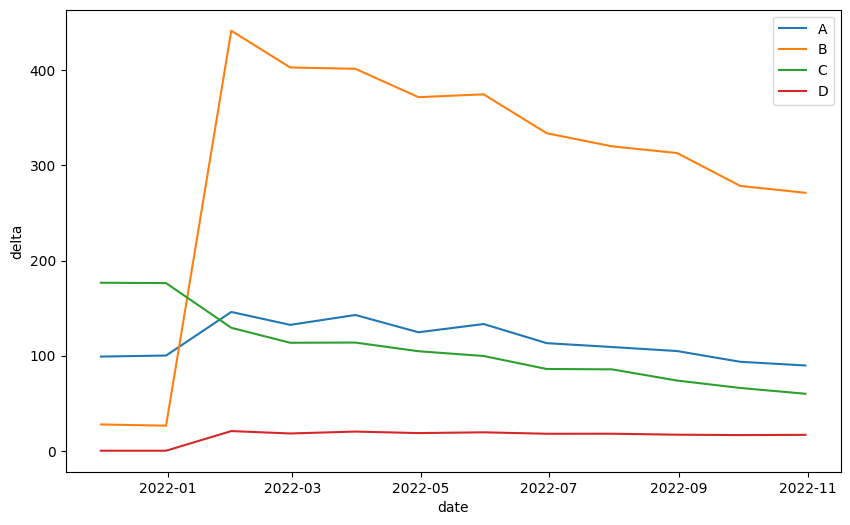

In [92]:
# Alle Deltas der vier Regionen plotten
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales_online_a, x='date', y='delta', label='A')
sns.lineplot(data=monthly_sales_online_b, x='date', y='delta', label='B')
sns.lineplot(data=monthly_sales_online_c, x='date', y='delta', label='C')
sns.lineplot(data=monthly_sales_online_d, x='date', y='delta', label='D')

# Hypothese 10: 

## Prognose erstellen:
- Anhand der Monate November/Dezember 2021 eine Prognose für Januar 2022 machen und schauen, ob die Abweichung in der Prognose vom realen Wert durch die veränderte Downtime erklärt wird 

### Beispielhaft für Region A:

In [93]:
# Anzahl Transaktionen pro Tag berechnen
daily_sales_online_a = sales_online_a.groupby(pd.Grouper(key='date', freq='D')).agg({'transaction_id': 'count'})
daily_sales_online_a

,transaction_id
date,
2021-11-01,23
2021-11-02,34
2021-11-03,32
2021-11-04,22
2021-11-05,43
...,...
2022-10-27,18
2022-10-28,27
2022-10-29,13


In [94]:
# Transaktionen pro Tag für die Monate November 2021 bis Januar 2022
daily_sales_online_a = daily_sales_online_a.loc['2021-11-01':'2022-01-31']

# In Dataframe umwandeln
daily_sales_online_a = daily_sales_online_a.reset_index()
daily_sales_online_a

,date,transaction_id
0,2021-11-01,23
1,2021-11-02,34
2,2021-11-03,32
3,2021-11-04,22
4,2021-11-05,43
...,...,...
87,2022-01-27,20
88,2022-01-28,23
89,2022-01-29,21
90,2022-01-30,27


In [95]:
# Exponentielle Glättung mit alpha=0.2
daily_sales_online_a['ewm'] = daily_sales_online_a['transaction_id'].ewm(alpha=0.2, adjust=False).mean()
daily_sales_online_a

,date,transaction_id,ewm
0,2021-11-01,23,23.000000
1,2021-11-02,34,25.200000
2,2021-11-03,32,26.560000
3,2021-11-04,22,25.648000
4,2021-11-05,43,29.118400
...,...,...,...
87,2022-01-27,20,23.853988
88,2022-01-28,23,23.683190
89,2022-01-29,21,23.146552
90,2022-01-30,27,23.917242


In [96]:
# Forecast Error berechnen
daily_sales_online_a['forecast_error'] = ((daily_sales_online_a['transaction_id'] - daily_sales_online_a['ewm']) / daily_sales_online_a['transaction_id']) * 100

# Alle Zeilen anzeigen
pd.set_option('display.max_rows', None)
daily_sales_online_a

,date,transaction_id,ewm,forecast_error
0,2021-11-01,23,23.000000,0.000000
1,2021-11-02,34,25.200000,25.882353
2,2021-11-03,32,26.560000,17.000000
3,2021-11-04,22,25.648000,-16.581818
4,2021-11-05,43,29.118400,32.282791
5,2021-11-06,30,29.294720,2.350933
6,2021-11-07,33,30.035776,8.982497
7,2021-11-08,31,30.228621,2.488320
8,2021-11-09,30,30.182897,-0.609655
9,2021-11-10,26,29.346317,-12.870451


In [97]:
# Group by week
weekly_sales_online_a = daily_sales_online_a.groupby(pd.Grouper(key='date', freq='W')).agg({'transaction_id': 'sum', 'ewm': 'sum'})
weekly_sales_online_a

,transaction_id,ewm
date,,
2021-11-07,217,188.856896
2021-11-14,198,202.727698
2021-11-21,210,209.707323
2021-11-28,207,205.423152
2021-12-05,211,211.128626
2021-12-12,205,202.810322
2021-12-19,206,207.418756
2021-12-26,187,198.567781
2022-01-02,215,203.784212


In [98]:
# Kalkuliere Prognosefehler als Prozent
weekly_sales_online_a['forecast_error'] = ((weekly_sales_online_a['transaction_id'] - weekly_sales_online_a['ewm']) / weekly_sales_online_a['transaction_id']) * 100
weekly_sales_online_a

,transaction_id,ewm,forecast_error
date,,,
2021-11-07,217,188.856896,12.969172
2021-11-14,198,202.727698,-2.387726
2021-11-21,210,209.707323,0.139370
2021-11-28,207,205.423152,0.761762
2021-12-05,211,211.128626,-0.060960
2021-12-12,205,202.810322,1.068136
2021-12-19,206,207.418756,-0.688717
2021-12-26,187,198.567781,-6.185979
2022-01-02,215,203.784212,5.216646


# Detailanalyse Regionen

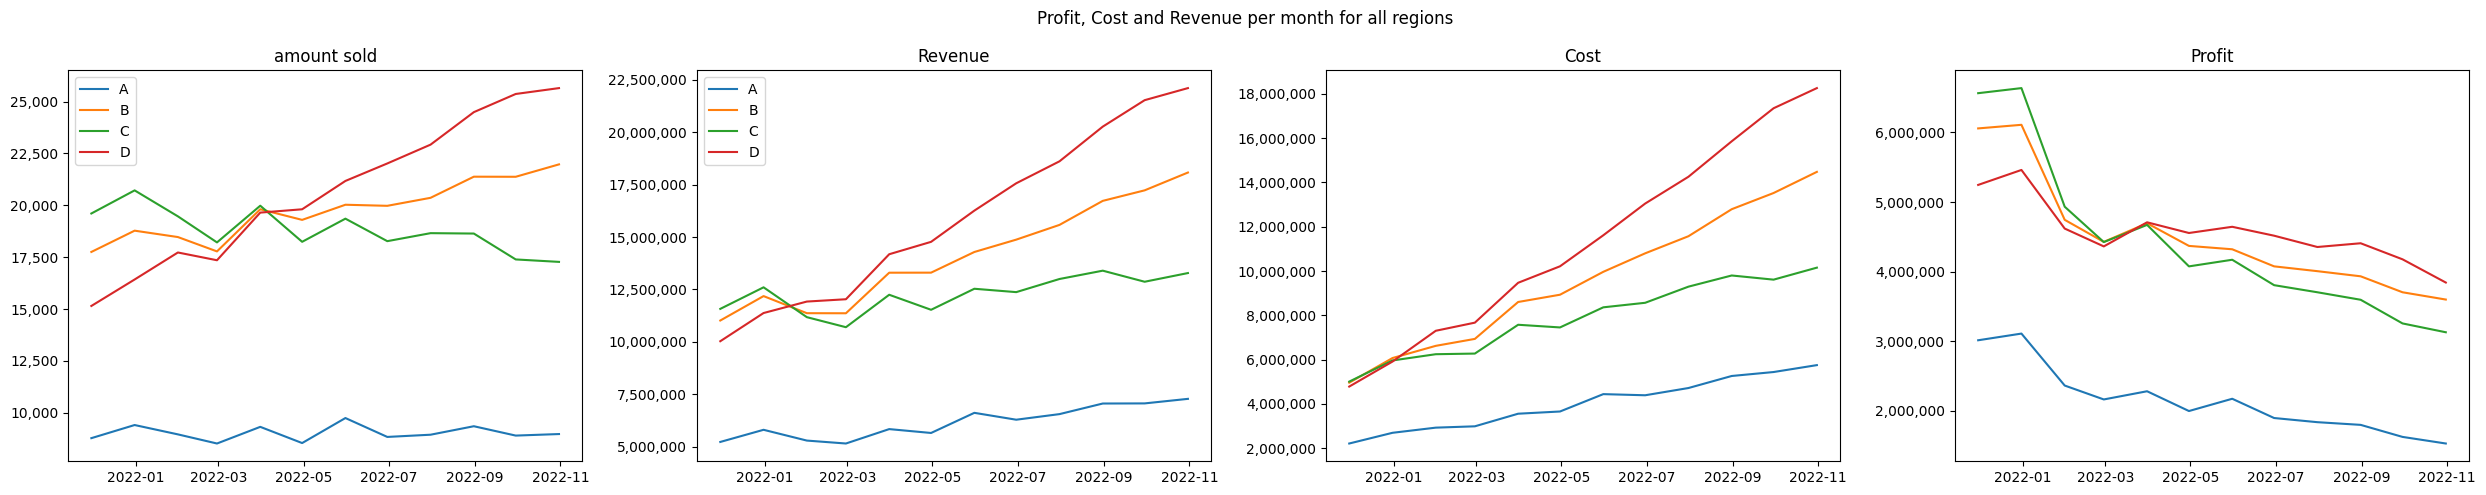

In [99]:
# Umsatz, Kosten und Gewinn pro Monat für alle Regionen jeweils als Subplot visualisieren und alle Subplots zusammenfassen
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle('Profit, Cost and Revenue per month for all regions')

axes[0].plot(df_sales_a['amount'], label='A')
axes[0].plot(df_sales_b['amount'], label='B')
axes[0].plot(df_sales_c['amount'], label='C')
axes[0].plot(df_sales_d['amount'], label='D')
axes[0].set_title('amount sold')
axes[0].legend()

axes[1].plot(df_sales_a['revenue'], label='A')
axes[1].plot(df_sales_b['revenue'], label='B')
axes[1].plot(df_sales_c['revenue'], label='C')
axes[1].plot(df_sales_d['revenue'], label='D')
axes[1].set_title('Revenue')
axes[1].legend()

axes[2].plot(df_sales_a['cost_total'], label='A')
axes[2].plot(df_sales_b['cost_total'], label='B')
axes[2].plot(df_sales_c['cost_total'], label='C')
axes[2].plot(df_sales_d['cost_total'], label='D')
axes[2].set_title('Cost')

axes[3].plot(df_sales_a['profit_total'], label='A')
axes[3].plot(df_sales_b['profit_total'], label='B')
axes[3].plot(df_sales_c['profit_total'], label='C')
axes[3].plot(df_sales_d['profit_total'], label='D')
axes[3].set_title('Profit')

# y-Achse in Millionen formatieren
for ax in axes:
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()

# Detailanalyse Gewinn pro Produkt pro Channel

# Detailanalyse Gewinn pro Region pro Produkt pro Channel


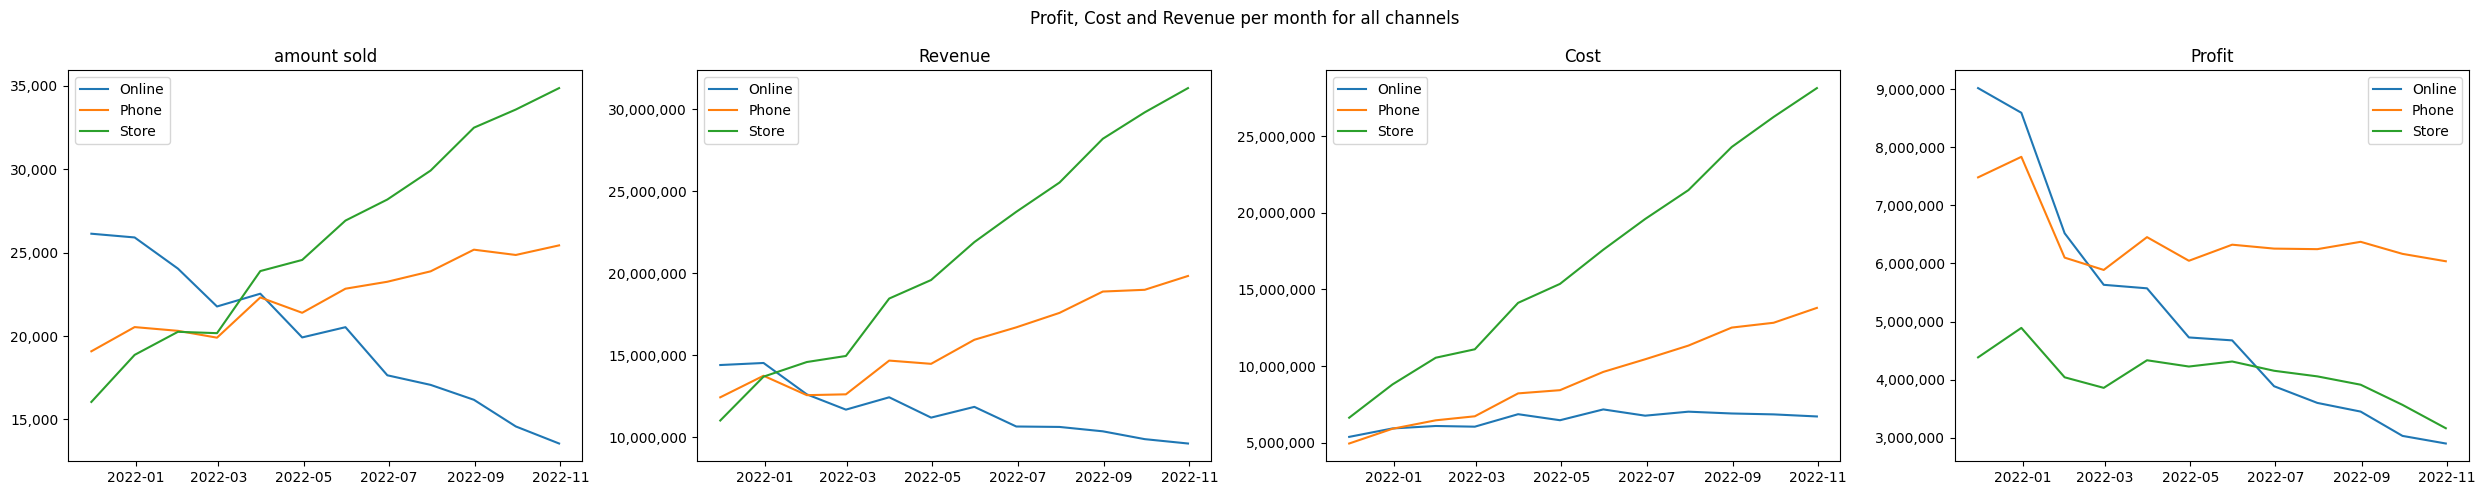

In [100]:
# Umsatz, Kosten und Gewinn pro Woche für alle Verkaufskanäle jeweils als Subplot visualisieren und alle Subplots zusammenfassen
fig, axes = plt.subplots(1, 4, figsize=(25, 5))
fig.suptitle('Profit, Cost and Revenue per month for all channels')

axes[0].plot(df_sales_online['amount'], label='Online')
axes[0].plot(df_sales_phone['amount'], label='Phone')
axes[0].plot(df_sales_store['amount'], label='Store')
axes[0].set_title('amount sold')
axes[0].legend()

axes[1].plot(df_sales_online['revenue'], label='Online')
axes[1].plot(df_sales_phone['revenue'], label='Phone')
axes[1].plot(df_sales_store['revenue'], label='Store')
axes[1].set_title('Revenue')
axes[1].legend()

axes[2].plot(df_sales_online['cost_total'], label='Online')
axes[2].plot(df_sales_phone['cost_total'], label='Phone')
axes[2].plot(df_sales_store['cost_total'], label='Store')
axes[2].set_title('Cost')
axes[2].legend()

axes[3].plot(df_sales_online['profit_total'], label='Online')
axes[3].plot(df_sales_phone['profit_total'], label='Phone')
axes[3].plot(df_sales_store['profit_total'], label='Store')
axes[3].set_title('Profit')
axes[3].legend()

# y-Achse in Millionen formatieren
for ax in axes:
    ax.yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
plt.tight_layout()

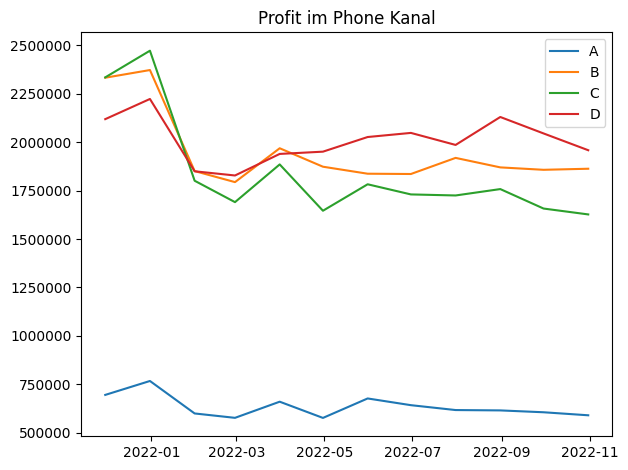

In [120]:
# Verkaufskanal Online für alle Regionen in einem Plot zusammenfassen
#fig, axes = plt.subplots(1, 3, figsize=(25, 5))

df_sales_phone 

df_sales_phone_a = df_sales[(df_sales['region'] == 'A') & (df_sales['channel'] == "phone")].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_phone_b = df_sales[(df_sales['region'] == 'B') & (df_sales['channel'] == 'phone')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_phone_c = df_sales[(df_sales['region'] == 'C') & (df_sales['channel'] == 'phone')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_phone_d = df_sales[(df_sales['region'] == 'D') & (df_sales['channel'] == 'phone')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_shop_a = df_sales[(df_sales['region'] == 'A') & (df_sales['channel'] == 'store')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

df_sales_shop_b = df_sales[(df_sales['region'] == 'B') & (df_sales['channel'] == 'store')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})
df_sales_shop_c = df_sales[(df_sales['region'] == 'C') & (df_sales['channel'] == 'store')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})
df_sales_shop_d = df_sales[(df_sales['region'] == 'D') & (df_sales['channel'] == 'store')].groupby(pd.Grouper(key='date', freq='M')).agg({"transaction_id": "count", 'amount': 'sum', 'revenue': 'sum', 'cost_total': 'sum', 'profit_total': 'sum'})

plt.plot(df_sales_phone_a["profit_total"], label='A')
plt.plot(df_sales_phone_b["profit_total"], label='B')
plt.plot(df_sales_phone_c["profit_total"], label='C')
plt.plot(df_sales_phone_d["profit_total"], label='D')
plt.title('Profit im Phone Kanal')
plt.legend()
plt.ticklabel_format(style='plain', axis='y') 



""" axes[1].plot(df_sales_shop_a["profit_total"], label='A')
axes[1].plot(df_sales_shop_b["profit_total"], label='B')
axes[1].plot(df_sales_shop_c["profit_total"], label='C')
axes[1].plot(df_sales_shop_d["profit_total"], label='D')
axes[1].set_title('Profit im Store Kanal')
axes[1].legend()

axes[2].plot(df_sales_online_a['profit_total'], label='A')
axes[2].plot(df_sales_online_b['profit_total'], label='B')
axes[2].plot(df_sales_online_c['profit_total'], label='C')
axes[2].plot(df_sales_online_d['profit_total'], label='D')
axes[2].set_title('Profit im Online Kanal')
axes[2].legend()
 """
# y-Achse ohne wissenschaftliche Notation
""" for ax in axes:
    ax.ticklabel_format(style='plain', axis='y') """
    
plt.tight_layout()



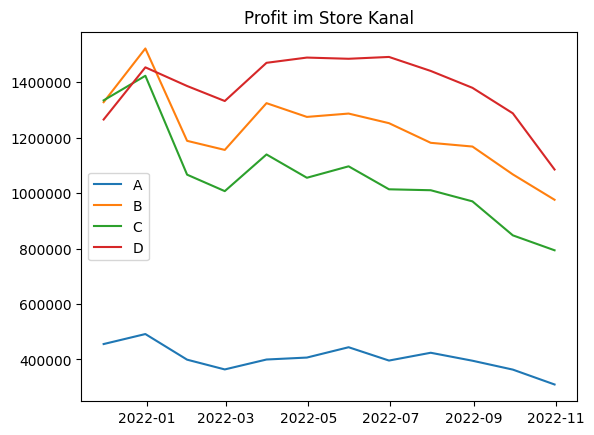

In [119]:
plt.plot(df_sales_shop_a["profit_total"], label='A')
plt.plot(df_sales_shop_b["profit_total"], label='B')
plt.plot(df_sales_shop_c["profit_total"], label='C')
plt.plot(df_sales_shop_d["profit_total"], label='D')
plt.title('Profit im Store Kanal')
plt.legend()
plt.ticklabel_format(style='plain', axis='y') 

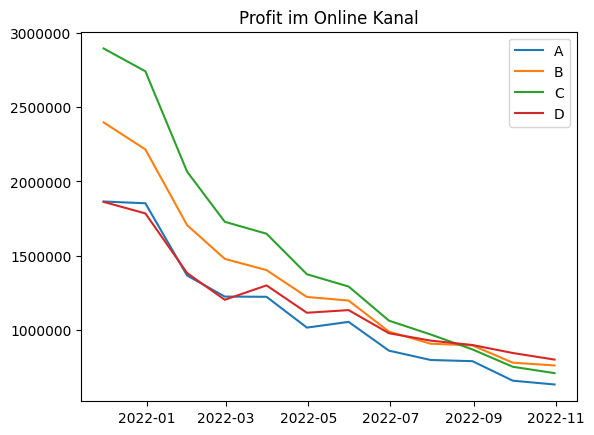

In [121]:
plt.plot(df_sales_online_a["profit_total"], label='A')
plt.plot(df_sales_online_b["profit_total"], label='B')
plt.plot(df_sales_online_c["profit_total"], label='C')
plt.plot(df_sales_online_d["profit_total"], label='D')
plt.title('Profit im Online Kanal')
plt.legend()
plt.ticklabel_format(style='plain', axis='y') 

In [102]:
sales_per_product_by_channel = df_sales.groupby(['channel', 'product']).agg({'amount': 'sum'})
# make the above for each region
sales_per_product_by_channel_region_a = df_sales[df_sales['region'] == 'A'].groupby(['channel', 'product']).agg({'amount': 'sum'})
sales_per_product_by_channel_region_b = df_sales[df_sales['region'] == 'B'].groupby(['channel', 'product']).agg({'amount': 'sum'})
sales_per_product_by_channel_region_c = df_sales[df_sales['region'] == 'C'].groupby(['channel', 'product']).agg({'amount': 'sum'})
sales_per_product_by_channel_region_d = df_sales[df_sales['region'] == 'D'].groupby(['channel', 'product']).agg({'amount': 'sum'})


<Figure size 1000x600 with 0 Axes>

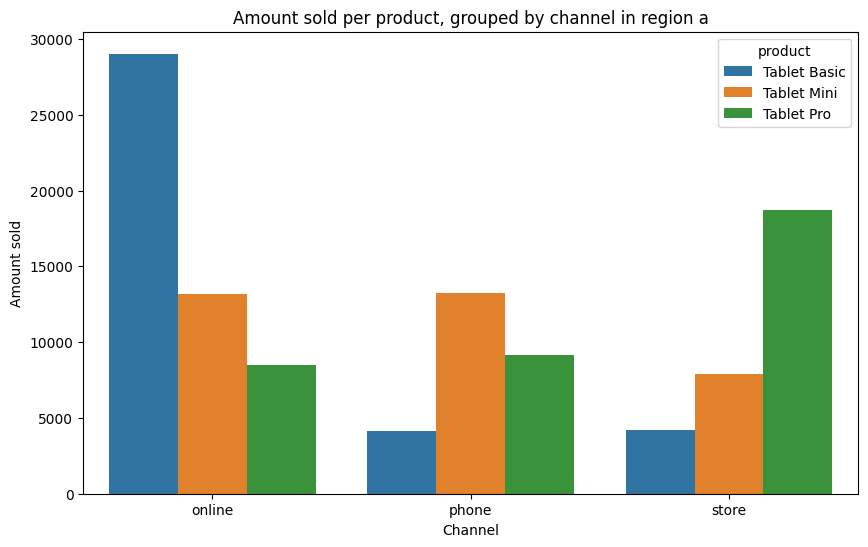

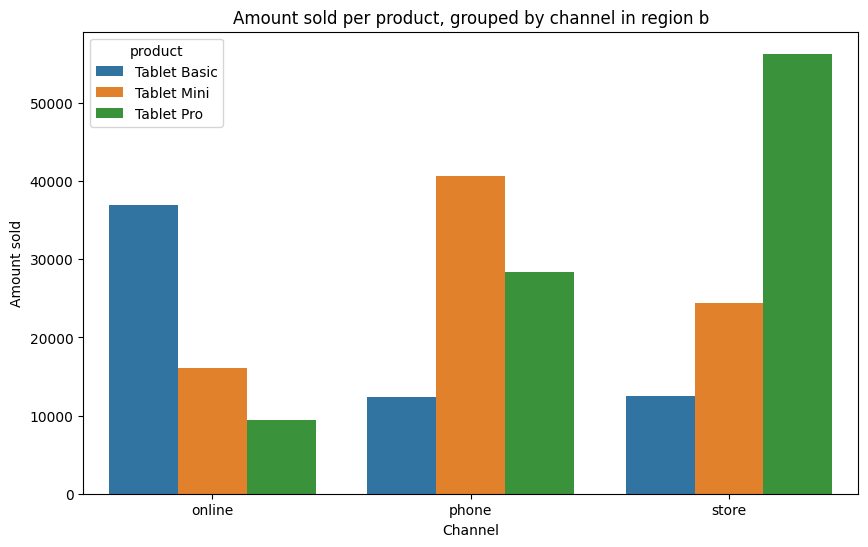

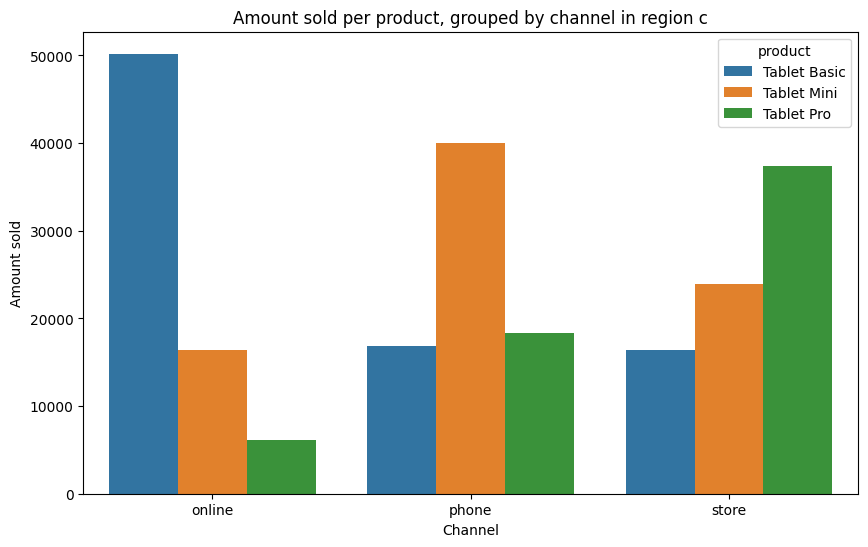

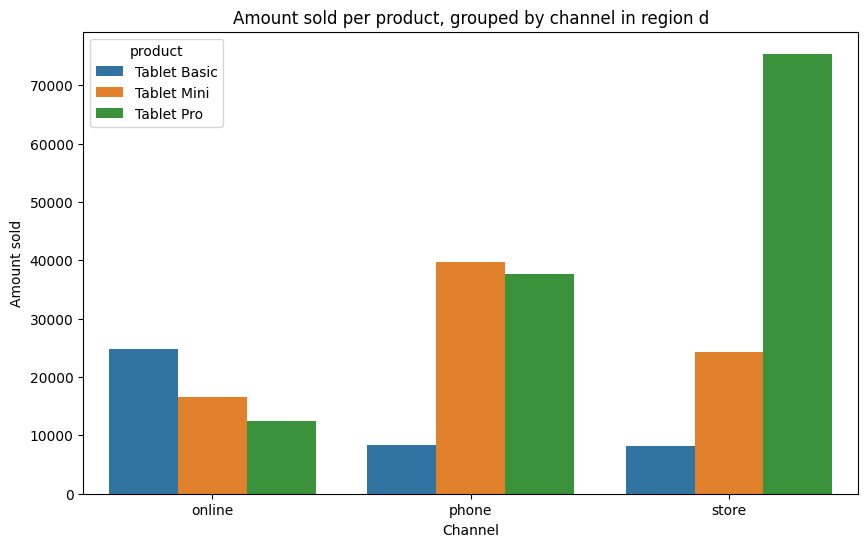

In [103]:
plt.figure(figsize=(10, 6))

regions = ['a', 'b', 'c', "d"]  # replace with your actual regions

for region in regions:
    # assuming the data for each region is stored in a similar named variable
    sales_per_product_by_channel_region = globals()['sales_per_product_by_channel_region_' + region]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=sales_per_product_by_channel_region, x='channel', y='amount', hue='product', orient='v')
    plt.title('Amount sold per product, grouped by channel in region ' + region)
    plt.xlabel('Channel')
    plt.ylabel('Amount sold')
    plt.show()

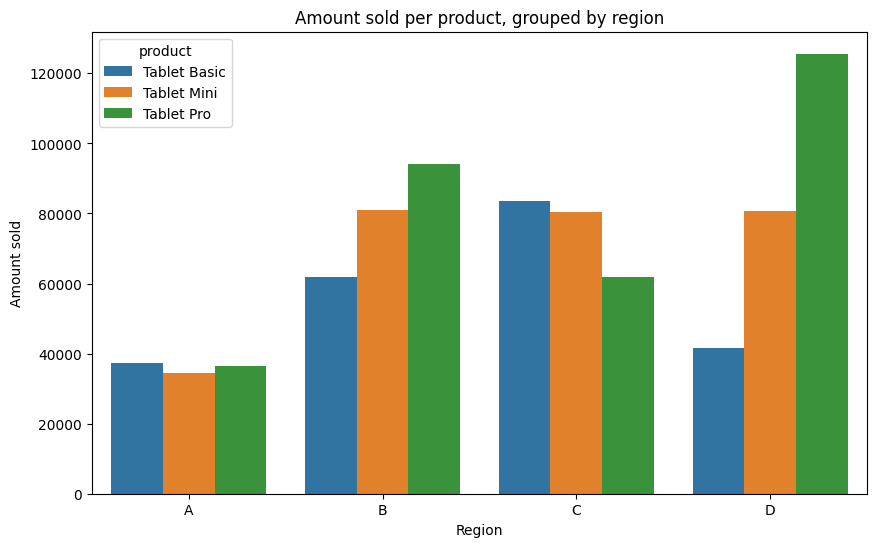

In [104]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sales_per_product_by_region, x='region', y='amount', hue='product')

plt.title('Amount sold per product, grouped by region')
plt.xlabel('Region')
plt.ylabel('Amount sold')
plt.show()